In [42]:
import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected = True)
import pycountry

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected= True)

from PIL import Image
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

%config InlineBackend.figure_format = 'retina'

import folium 
from folium import plugins

plt.rcParams['figure.figsize'] = 8, 5

import warnings
warnings.filterwarnings('ignore')
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [43]:
salarysurvey = pd.read_csv(r'C:\Users\HP\Documents\QA Python\Quantum Python Datasets\IT Salary Survey EU  2020.csv')

In [148]:
salarysurvey

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR",Total Income (Salary+Bonus),AgeGroup
0,24/11/2020 11:14:15,26,Male,MUNICH,SOFTWARE ENGINEER,5,3,SENIOR,TYPESCRIPT,"KOTLIN, JAVASCRIPT / TYPESCRIPT",...,FULL-TIME EMPLOYEE,Unlimited contract,English,51-100,Product,No,_MISSING_,_MISSING_,85000,"(25, 30]"
1,24/11/2020 11:14:16,26,Male,BERLIN,BACKEND DEVELOPER,7,4,SENIOR,RUBY,_MISSING_,...,FULL-TIME EMPLOYEE,Unlimited contract,English,101-1000,Product,No,_MISSING_,_MISSING_,80000,"(25, 30]"


###### CLEANING THE DATASET

In [45]:
# show all columns
print(salarysurvey.columns.tolist())

['Timestamp', 'Age', 'Gender', 'City', 'Position ', 'Total years of experience', 'Years of experience in Germany', 'Seniority level', 'Your main technology / programming language', 'Other technologies/programming languages you use often', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Yearly bonus + stocks in EUR', 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country', 'Annual bonus+stocks one year ago. Only answer if staying in same country', 'Number of vacation days', 'Employment status', 'Сontract duration', 'Main language at work', 'Company size', 'Company type', 'Have you lost your job due to the coronavirus outbreak?', 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']


In [46]:
# rename columns
salarysurvey.rename(columns = {'Position ':'Position'}, inplace = True)

In [47]:
salarysurveynumerical = ['Age',
                'Yearly brutto salary (without bonus and stocks) in EUR',
                'Yearly bonus + stocks in EUR',]

In [48]:
salarysurveycategorical = ['Gender', 'City', 'Position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Number of vacation days',
       'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

In [50]:
#to view messy numerical column
#salarysurvey['Number of vacation days'].value_counts()

# to fill categorical missing data
missing_text = '_MISSING_'
salarysurvey[salarysurveycategorical] = salarysurvey[salarysurveycategorical].fillna(missing_text)

#to fill numerical missing data
missing_num = -1
salarysurvey[salarysurveynumerical] = salarysurvey[salarysurveynumerical].fillna(missing_num)

In [51]:
# string cleaning (remove redundant spaces and convert to upper case)

def clean_string(x):
    return x.strip().upper()

cleanedcolumns = ['City', 'Position', 'Employment status',
                                'Your main technology / programming language',
                                'Other technologies/programming languages you use often',
                                'Seniority level',
                                'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                                'Number of vacation days']

for i in cleanedcolumns:
    salarysurvey[i] = salarysurvey[i].apply(clean_string)

In [147]:
# reduce number of levels: "Position"
column = 'Position'
#print('ORIGINAL:', column)
original_count = salarysurvey[column].value_counts()
#print(original_count)

# reduce to levels that occur at least freq_min times
freq_min = 3
keep_levels = list(original_count[original_count.values>=freq_min].index)
salarysurvey[column] = salarysurvey[column].where(salarysurvey[column].isin(keep_levels), '_OTHER_')
#print('\nREDUCED TO:')
#print(salarysurvey[column].value_counts())

In [53]:
# reduce number of levels: "Seniority level"
column = 'Seniority level'
#print('ORIGINAL:', column)
original_count = salarysurvey[column].value_counts()
#print(original_count)

# reduce to levels that occur at least freq_min times
freq_min = 3
keep_levels = list(original_count[original_count.values>=freq_min].index)
salarysurvey[column] = salarysurvey[column].where(salarysurvey[column].isin(keep_levels), '_OTHER_')
#print('\nREDUCED TO:')
#print(salarysurvey[column].value_counts())

In [54]:
# reduce number of levels: "Main language at work"
column = 'Main language at work'

# manual adjustment first
salarysurvey[column].loc[salarysurvey[column]=='Русский'] = 'Russian'

#print('ORIGINAL:', column)
original_count = salarysurvey[column].value_counts()
#print(original_count)

# reduce to levels that occur at least freq_min times
freq_min = 3
keep_levels = list(original_count[original_count.values>=freq_min].index)
salarysurvey[column] = salarysurvey[column].where(salarysurvey[column].isin(keep_levels), '_OTHER_')
#print('\nREDUCED TO:')
#print(salarysurvey[column].value_counts())

In [55]:
# reduce number of levels: "Employment status"
column = 'Employment status'
#print('ORIGINAL:', column)
original_count = salarysurvey[column].value_counts()
#print(original_count)

# reduce to levels that occur at least freq_min times
freq_min = 2
keep_levels = list(original_count[original_count.values>=freq_min].index)
salarysurvey[column] = salarysurvey[column].where(salarysurvey[column].isin(keep_levels), '_OTHER_')
#print('\nREDUCED TO:')
#print(salarysurvey[column].value_counts())

In [56]:
# reduce number of levels: "Company type"
column = 'Company type'
#print('ORIGINAL:', column)
original_count = salarysurvey[column].value_counts()
#print(original_count)

# reduce to levels that occur at least freq_min times
freq_min = 3
keep_levels = list(original_count[original_count.values>=freq_min].index)
salarysurvey[column] = salarysurvey[column].where(salarysurvey[column].isin(keep_levels), '_OTHER_')
#print('\nREDUCED TO:')
#print(salarysurvey[column].value_counts())

In [57]:
# reduce number of levels: "Have you received additional monetary support..."
column = 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'
#print('ORIGINAL:', column)
original_count = salarysurvey[column].value_counts()
#print(original_count)

# reduce to levels that occur at least freq_min times
freq_min = 3
keep_levels = list(original_count[original_count.values>=freq_min].index)
salarysurvey[column] = salarysurvey[column].where(salarysurvey[column].isin(keep_levels), '_OTHER_')
#print('\nREDUCED TO:')
#print(salarysurvey[column].value_counts())

In [58]:
# reduce number of levels: "Have you lost your job due to the coronavirus outbreak?"
column = 'Have you lost your job due to the coronavirus outbreak?'
#print('ORIGINAL:', column)
original_count = salarysurvey[column].value_counts()
#print(original_count)

# reduce to levels that occur at least freq_min times
freq_min = 2
keep_levels = list(original_count[original_count.values>=freq_min].index)
salarysurvey[column] = salarysurvey[column].where(salarysurvey[column].isin(keep_levels), '_OTHER_')
#print('\nREDUCED TO:')
#print(salarysurvey[column].value_counts())

In [59]:
column = 'Number of vacation days' 
print(salarysurvey[column].value_counts().index.tolist())

['30', '28', '27', '25', '26', '_MISSING_', '24', '29', '20', '21', '32', 'UNLIMITED', '22', '31', '36', '35', '40', '23', '0', '14', '33', '45', '15', '12', '37.5', '1', '38', '5', '37', '99', '39', '34', '24 LABOUR DAYS', '16', '23+', '50', '~25', '3', '30 IN CONTRACT (BUT THEORETICALLY UNLIMITED)', '(NO IDEA)', '60', '365', '10']


In [60]:
# replace messy/incorrect data
salarysurvey[column].loc[salarysurvey[column]=='30 IN CONTRACT (BUT THEORETICALLY UNLIMITED)'] = 'UNLIMITED'
salarysurvey[column].loc[salarysurvey[column]=='23+'] = '23'
salarysurvey[column].loc[salarysurvey[column]=='(NO IDEA)'] = '_MISSING_'
salarysurvey[column].loc[salarysurvey[column]=='24 LABOUR DAYS'] = '24'
salarysurvey[column].loc[salarysurvey[column]=='~25'] = '25'
salarysurvey[column].loc[salarysurvey[column]=='365'] = 'UNLIMITED'

In [61]:
print(salarysurvey[column].value_counts().index.tolist())

['30', '28', '27', '25', '26', '_MISSING_', '24', '29', '20', 'UNLIMITED', '21', '31', '22', '32', '36', '23', '35', '40', '0', '14', '45', '33', '15', '12', '60', '16', '3', '38', '50', '99', '37.5', '1', '5', '37', '39', '34', '10']


In [62]:
column = 'Total years of experience'
# show all levels
print(salarysurvey[column].value_counts().index.tolist())

['10', '5', '6', '8', '7', '4', '12', '3', '15', '9', '2', '11', '13', '14', '1', '20', '16', '18', '_MISSING_', '17', '25', '19', '0', '22', '30', '2.5', '21', '1.5', '1,5', '23', '0.8', '27', '3.5', '4.5', '6 (not as a data scientist, but as a lab scientist)', '31', '15, thereof 8 as CTO', '2,5', '383', '1 (as QA Engineer) / 11 in total', '5.5', '24', '29', '28', '7.5', '6.5', '26', '40', 'less than year']


In [63]:
# replace messy/incorrect data
salarysurvey[column].loc[salarysurvey[column]=='6 (not as a data scientist, but as a lab scientist)'] = '6'
salarysurvey[column].loc[salarysurvey[column]=='less than year'] = '1'
salarysurvey[column].loc[salarysurvey[column]=='15, thereof 8 as CTO'] = '15'
salarysurvey[column].loc[salarysurvey[column]=='1 (as QA Engineer) / 11 in total'] = '11'
salarysurvey[column].loc[salarysurvey[column]=='383'] = '_MISSING_'
salarysurvey[column].loc[salarysurvey[column]=='1,5'] = '1.5'
salarysurvey[column].loc[salarysurvey[column]=='2,5'] = '2.5'

In [64]:
column = 'Years of experience in Germany'
# show all data
print(salarysurvey[column].value_counts().index.tolist())

['2', '1', '3', '5', '4', '0', '6', '7', '_MISSING_', '10', '1.5', '9', '8', '0.5', '12', '2.5', '3.5', '15', '20', '11', '0,5', '1,5', '14', '13', '30', '2,5', '19', '0.25', '18', '3,5', '3 months', '⁰', '<1', '3 (in Poland)', '0,3', '-', '2.6', '0.1', '4.5', '6 (not as a data scientist, but as a lab scientist)', '0.2', '4 (in Switzerland), 0 (in Germany)', '26', '4 month', '17', '16', '< 1', '25', '0.9', '0.4', '1,7', '0.8', '4,5', 'less than year']


In [65]:
# replace messy/incorrect data
salarysurvey[column].loc[salarysurvey[column]=='0,3'] = '0.3'
salarysurvey[column].loc[salarysurvey[column]=='0,5'] = '0.5'
salarysurvey[column].loc[salarysurvey[column]=='1,5'] = '1.5'
salarysurvey[column].loc[salarysurvey[column]=='1,7'] = '1.7'
salarysurvey[column].loc[salarysurvey[column]=='2,5'] = '2.5'
salarysurvey[column].loc[salarysurvey[column]=='3,5'] = '3.5'
salarysurvey[column].loc[salarysurvey[column]=='4,5'] = '4.5'
salarysurvey[column].loc[salarysurvey[column]=='<1'] = '0.5'
salarysurvey[column].loc[salarysurvey[column]=='< 1'] = '0.5'
salarysurvey[column].loc[salarysurvey[column]=='3 months'] = '0.25'
salarysurvey[column].loc[salarysurvey[column]=='4 month'] = '0.33'
salarysurvey[column].loc[salarysurvey[column]=='4 (in Switzerland), 0 (in Germany)'] = '0'
salarysurvey[column].loc[salarysurvey[column]=='less than year'] = '0.5'
salarysurvey[column].loc[salarysurvey[column]=='⁰'] = '_MISSING_'
salarysurvey[column].loc[salarysurvey[column]=='-'] = '_MISSING_'
salarysurvey[column].loc[salarysurvey[column]=='6 (not as a data scientist, but as a lab scientist)'] = '6'
salarysurvey[column].loc[salarysurvey[column]=='3 (in Poland)'] = '0'

In [66]:
column = 'Yearly bonus + stocks in EUR'
# show all data
print(salarysurvey[column].value_counts().index.tolist())

[-1, '0', '5000', '10000', '2000', '6000', '1000', '3000', '20000', '4000', '15000', '7000', '8000', '12000', '70000', '75000', '101', '30000', '40000', '1500', '100000', '60000', '50000', '80000', '25000', '65000', '200000', '55000', '45000', '500', '7500', '120000', '18000', '95000', '11000', '77000', '90000', '35000', '9000', '4500', '150000', '73000', '85000', '17000', '62000', '72000', '15900', '2500', '6500', '13000', '56000', '800', '14000', '78000', '16000', '99000', '15000+-', '6710', 'depends', '43000', '106000', '71000', '87250', '21000', '23000', '4400', '3600', '84000', '16320', '97000', '1100', '5000000000', '66500', '105000', '37968', 'Not sure', 'Na', '700', '1200', '92000', '45500', '25', '63000', '31500', '28000', '3800', '7200', '80400', '125000', '-', '110000', '12500', '7100', '107000', '2800', '36000', '82500', '53500', '66447', '9450', '82000', '170000', '58000', '54000', '1250', '3250', '60847.32', '3375', '11900', '102600', '89000', '5600', '122.13', '400', '46

In [67]:
# replace messy/incorrect data
salarysurvey[column].loc[salarysurvey[column]=='bvg only'] = -1
salarysurvey[column].loc[salarysurvey[column]=='-'] = -1
salarysurvey[column].loc[salarysurvey[column]=='-'] = -1
salarysurvey[column].loc[salarysurvey[column]=='15000+-'] = 15000
salarysurvey[column].loc[salarysurvey[column]=='Not sure'] = -1
salarysurvey[column].loc[salarysurvey[column]=='Na'] = -1
salarysurvey[column].loc[salarysurvey[column]=='depends'] = -1
salarysurvey[column].loc[salarysurvey[column]=='1150000'] = -1 

# and convert to numeric
salarysurvey[column] = salarysurvey[column].astype(float)

# REPLACE THE MISSINGS/UNKNOWNS with 0!!!
salarysurvey[column].loc[salarysurvey[column]==-1] = 0

In [190]:
salarysurvey['Total Income (Salary+Bonus)'] = salarysurvey['Yearly brutto salary (without bonus and stocks) in EUR'] + salarysurvey['Yearly bonus + stocks in EUR']

In [191]:
# Add to numerical category
salarysurveynumerical.append('Total Income (Salary+Bonus)')

In [192]:
#cleaning the main programming languages column
Main_Programming_Languages = salarysurvey.replace({'Your main technology / programming language': {'python':'Python', 'Javascript': 'JavaScript','c#':'C#', 'javascript': 'JavaScript', 'JavScript':'JavaScript', 'Pyrhon': 'Python', '.net':'.Net','c++': 'C++', 'C,C++': 'C++','c/c++': 'C++', 'C/C++': 'C++', 'JavaScript / TypeScript': 'JavaScript/Typescript', 'java': 'Java'}})

###### #EXPLORATORY ANALYSIS OF CATEGORICAL COLUMNS IN THE DATASET

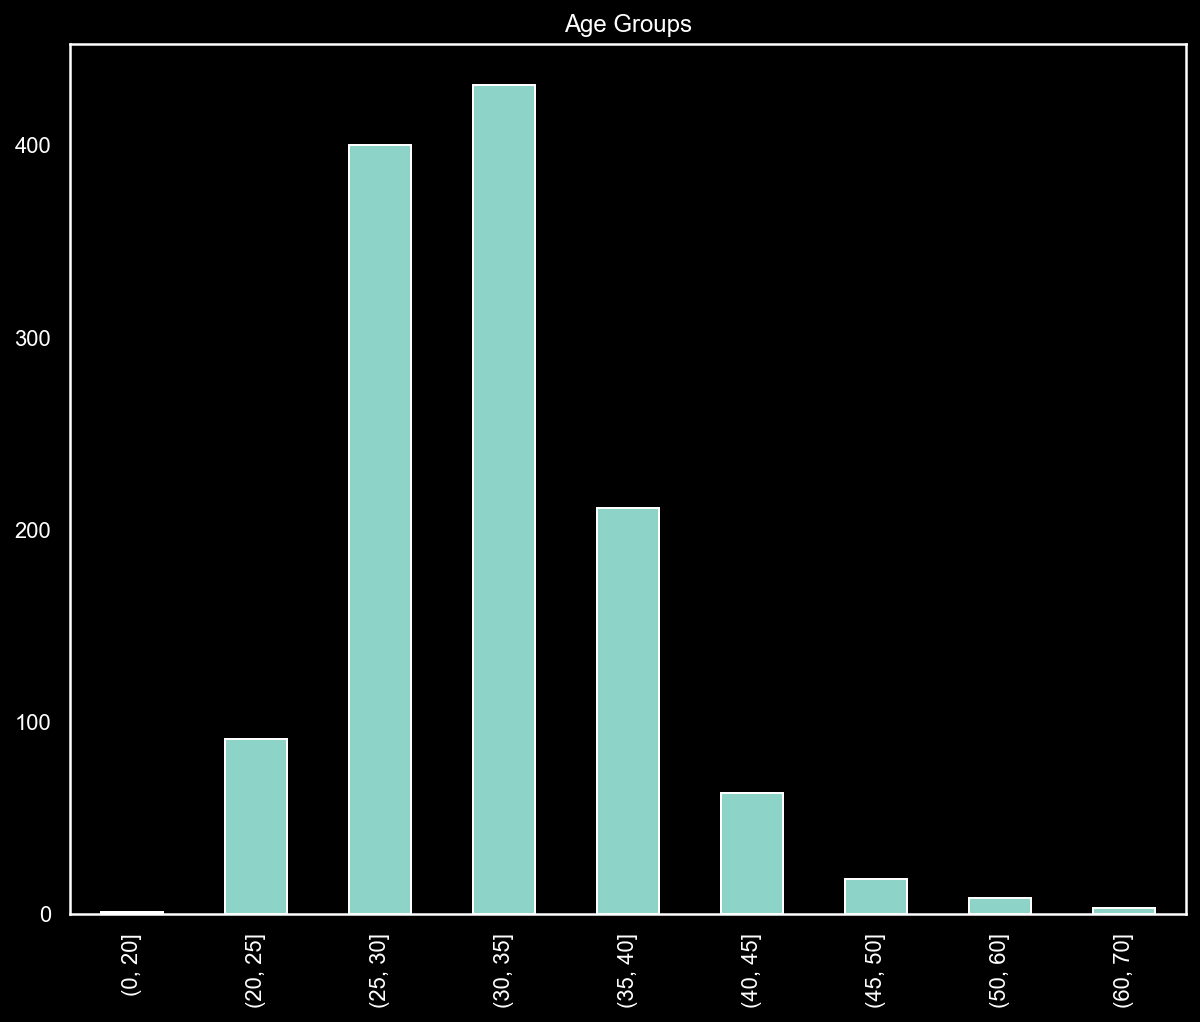

In [150]:
# bar chart depicting number of survey participants per age group
plt.style.use('dark_background')
plt.figure(figsize=(10,8))
salarysurvey['AgeGroup'] = pd.cut(salarysurvey.Age, bins=[0,20,25,30,35,40,45,50,60,70])
salarysurvey.AgeGroup.value_counts().sort_index().plot(kind='bar')
plt.title('Age Groups')
plt.grid()
plt.show()

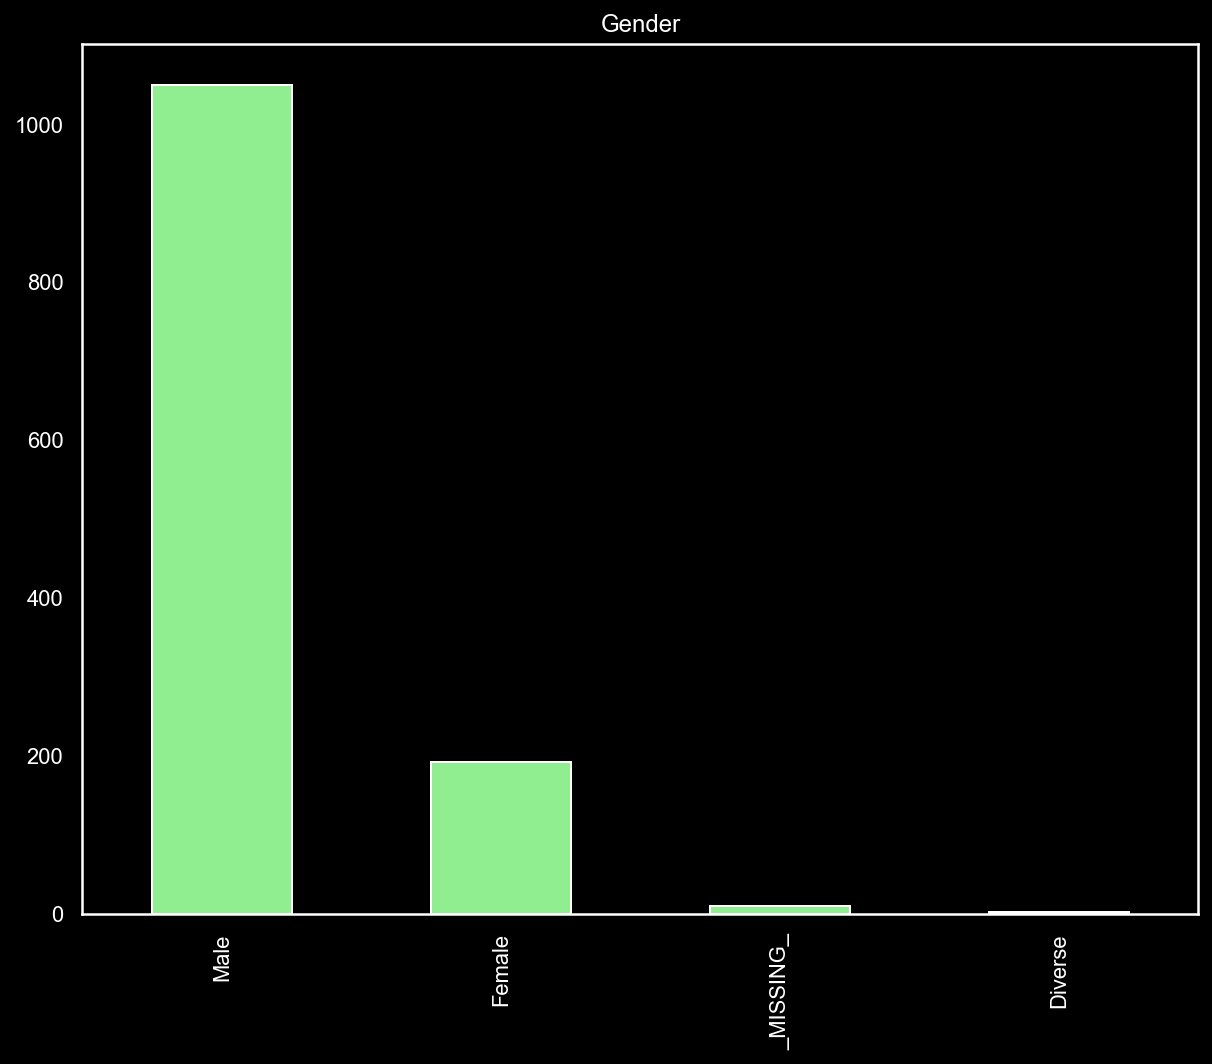

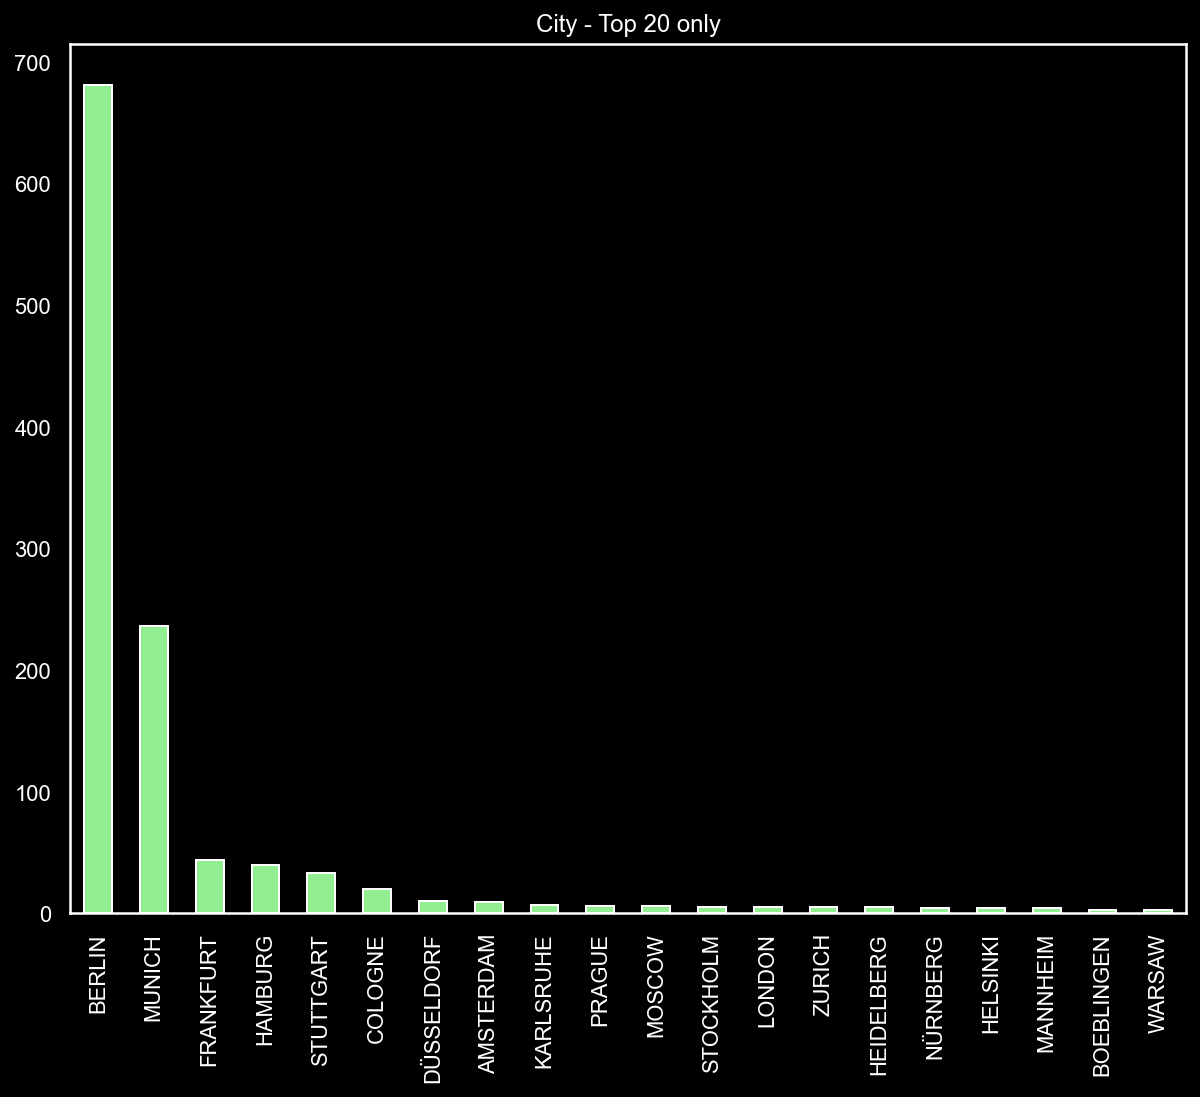

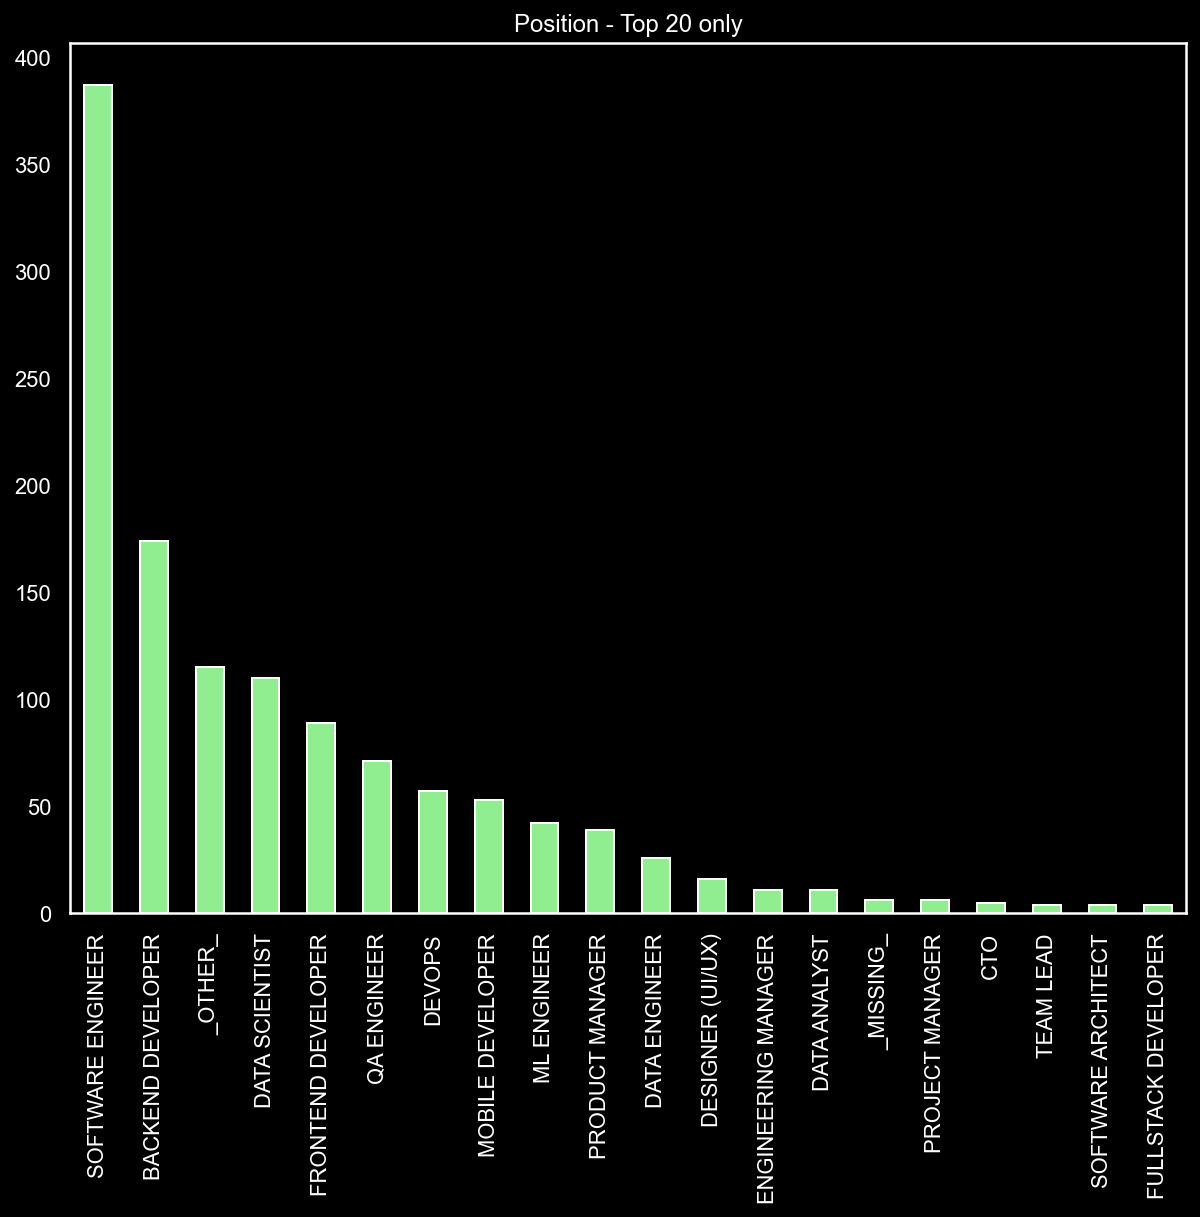

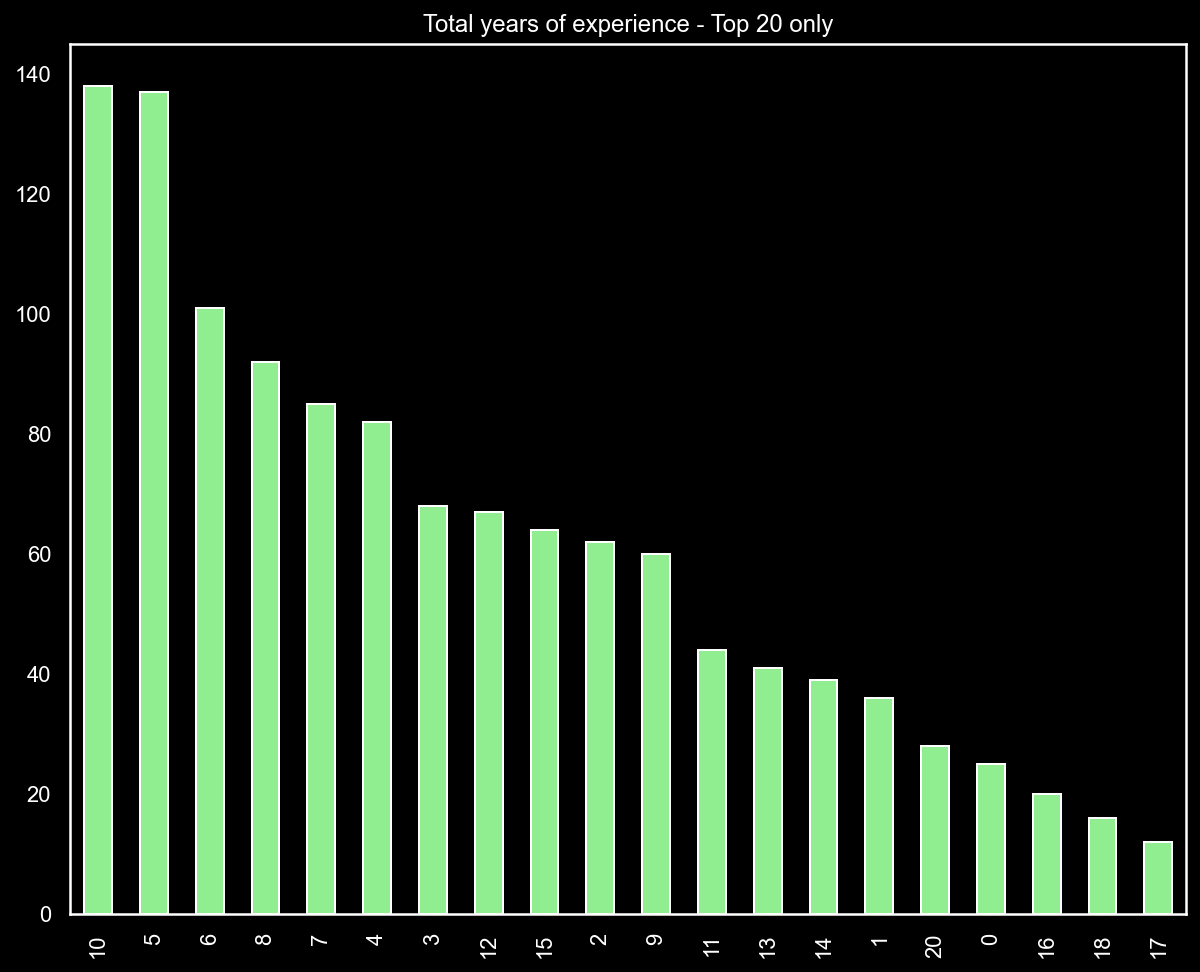

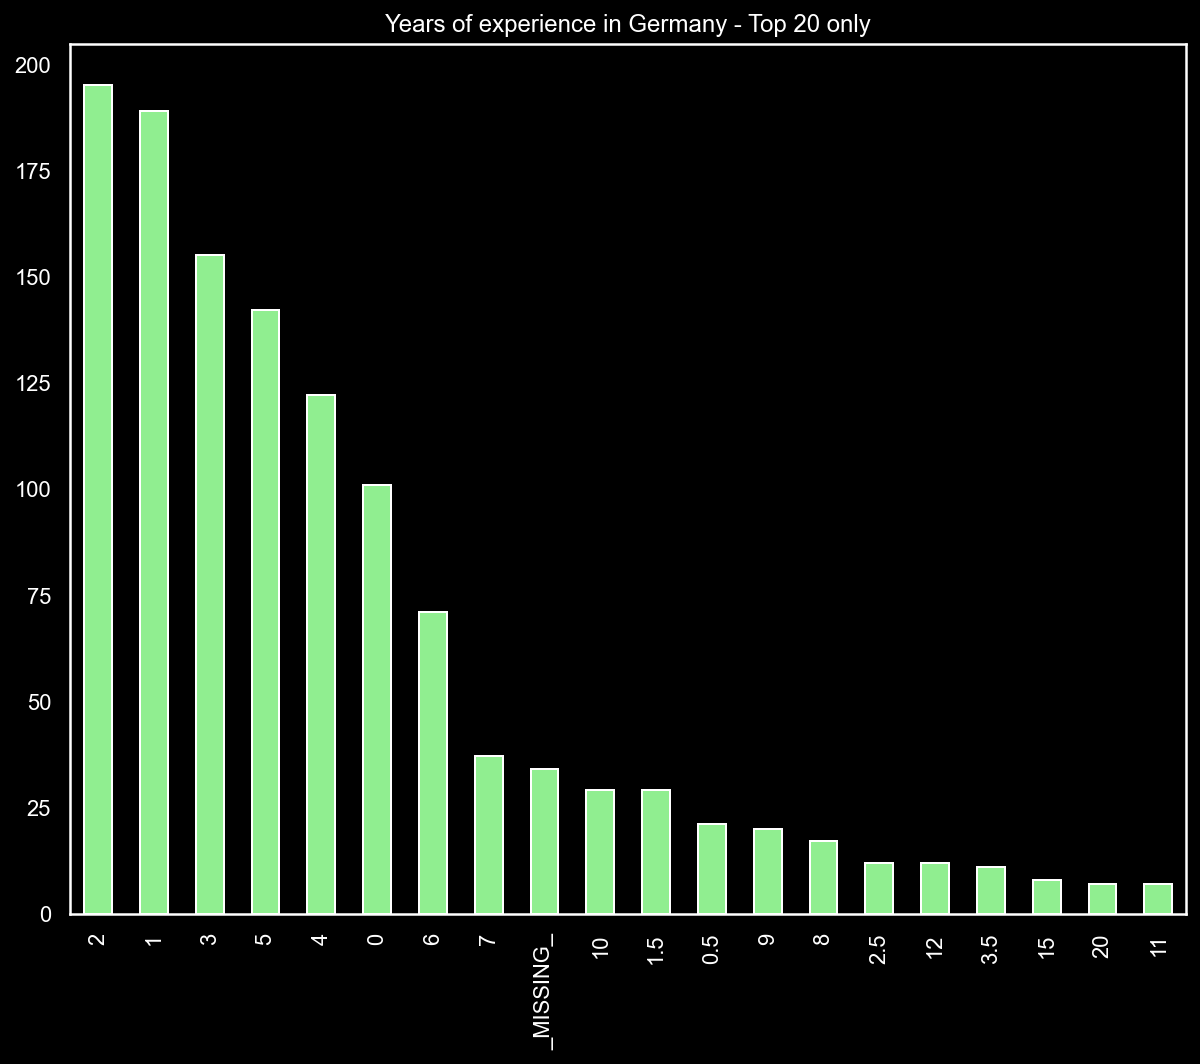

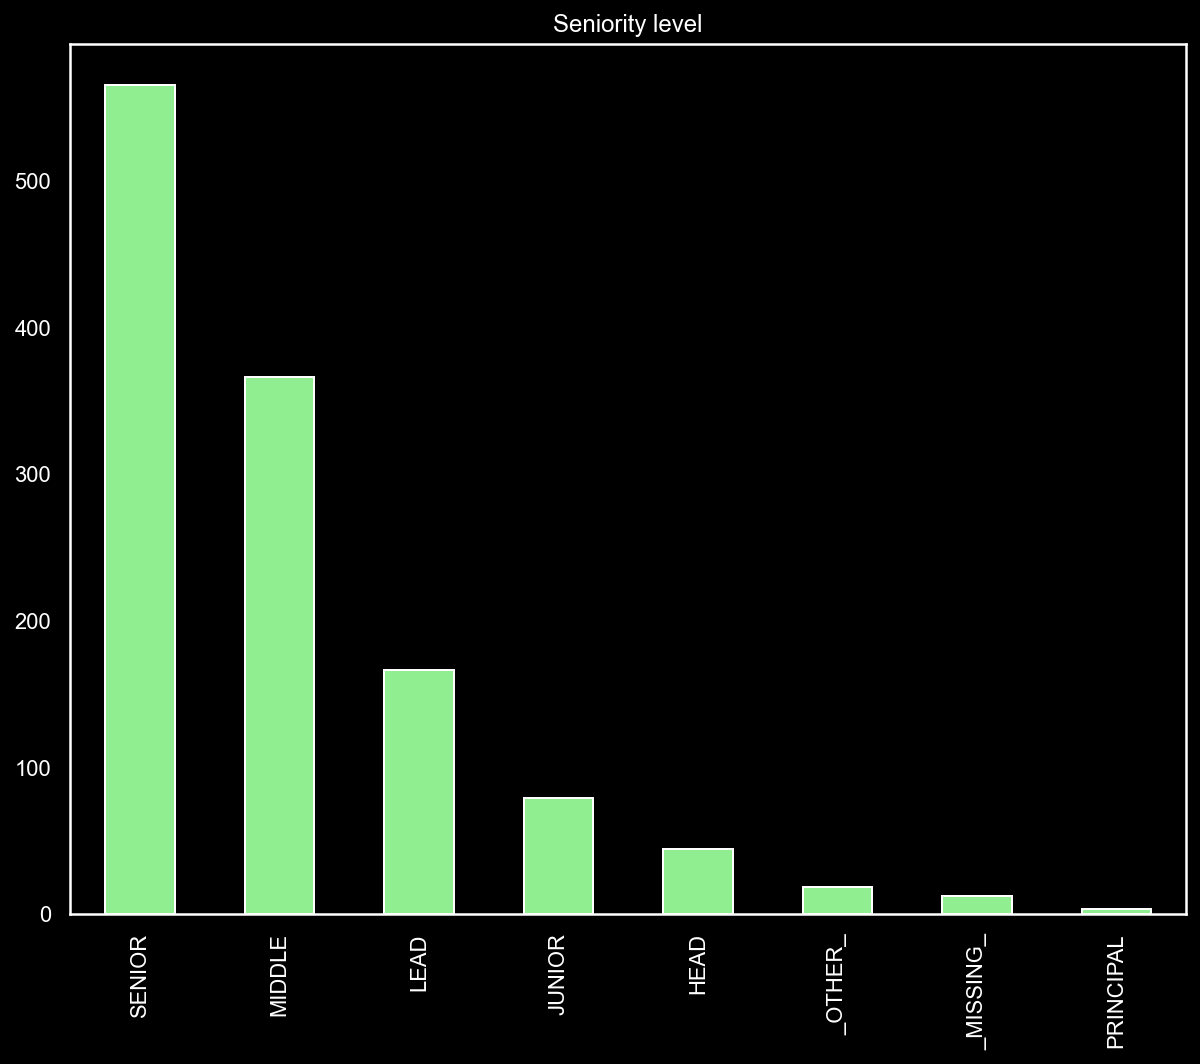

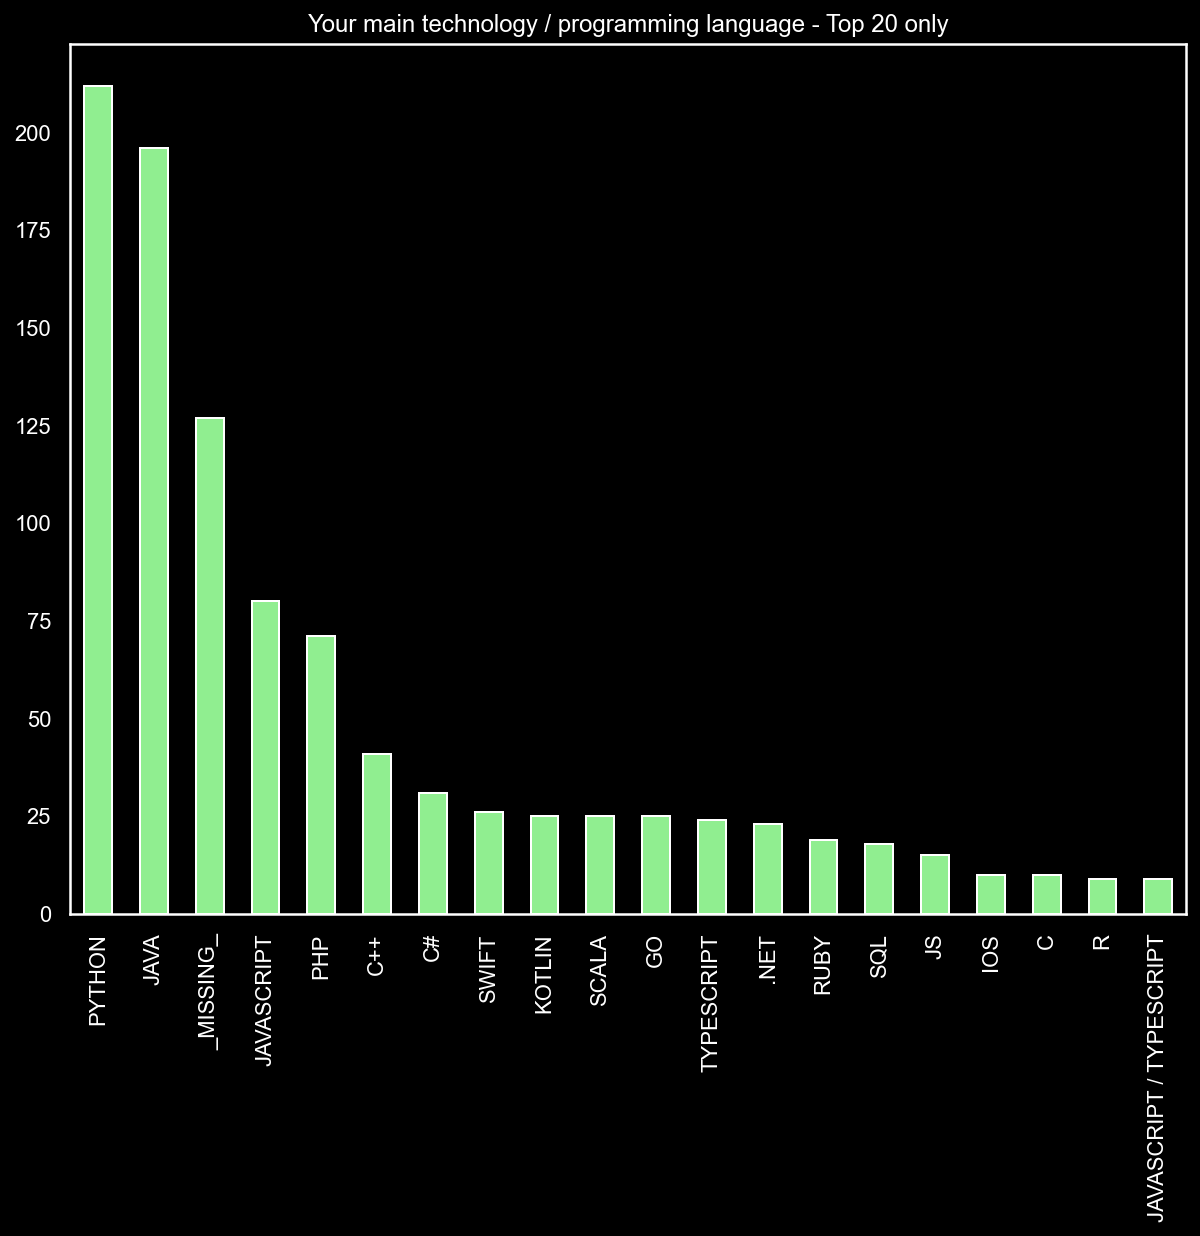

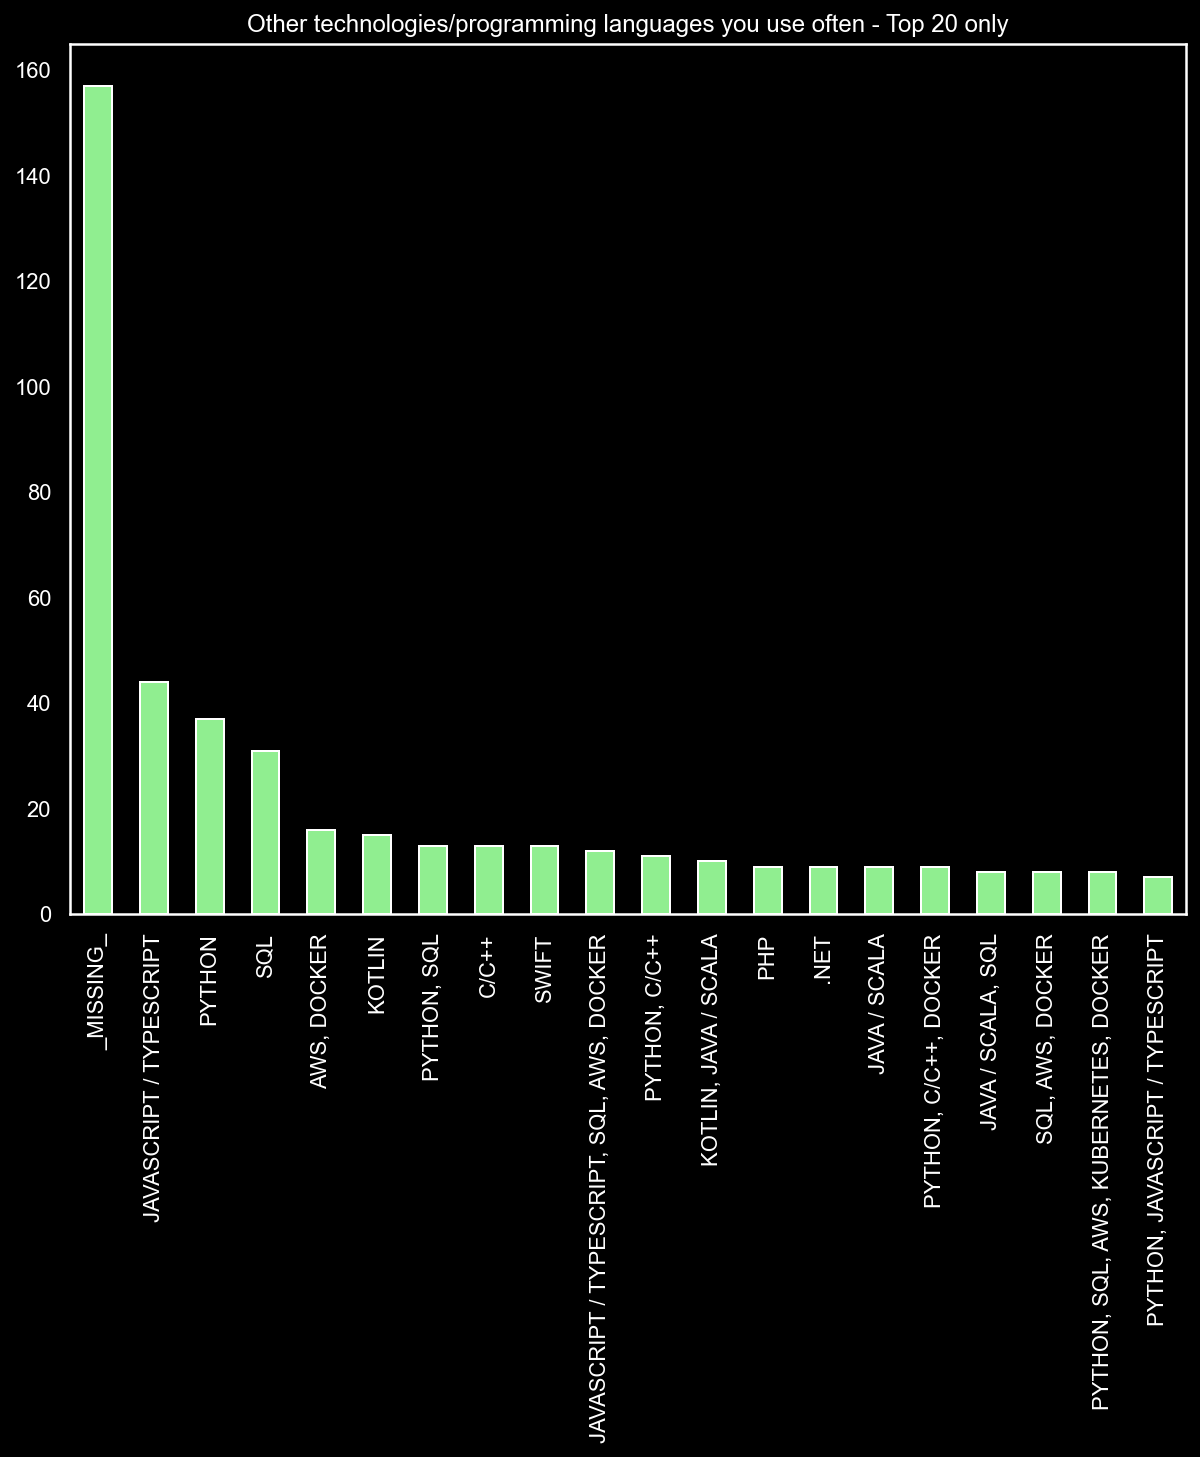

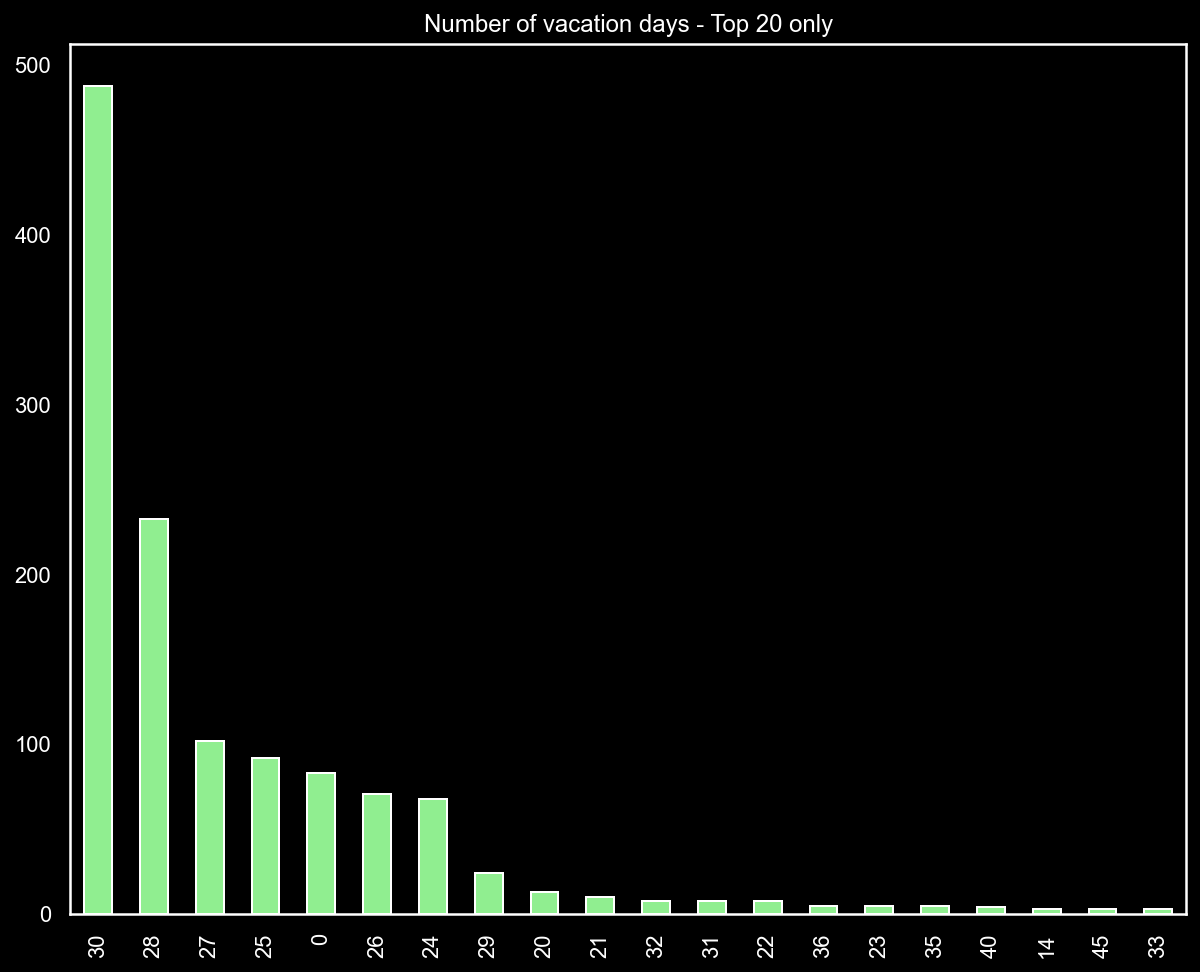

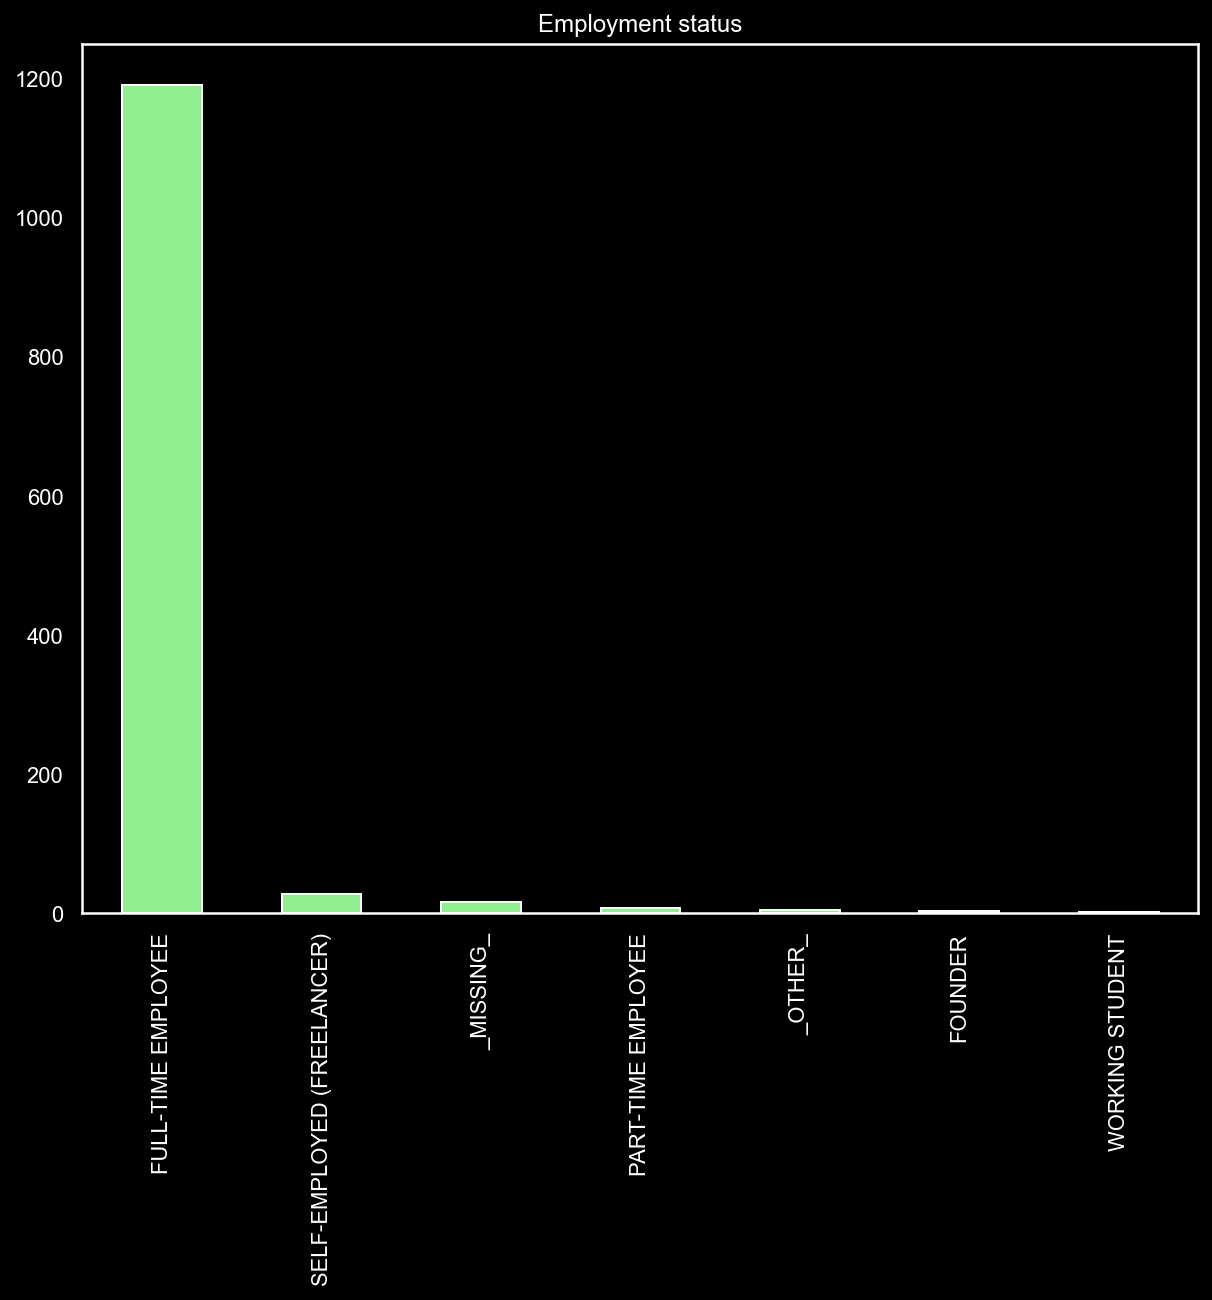

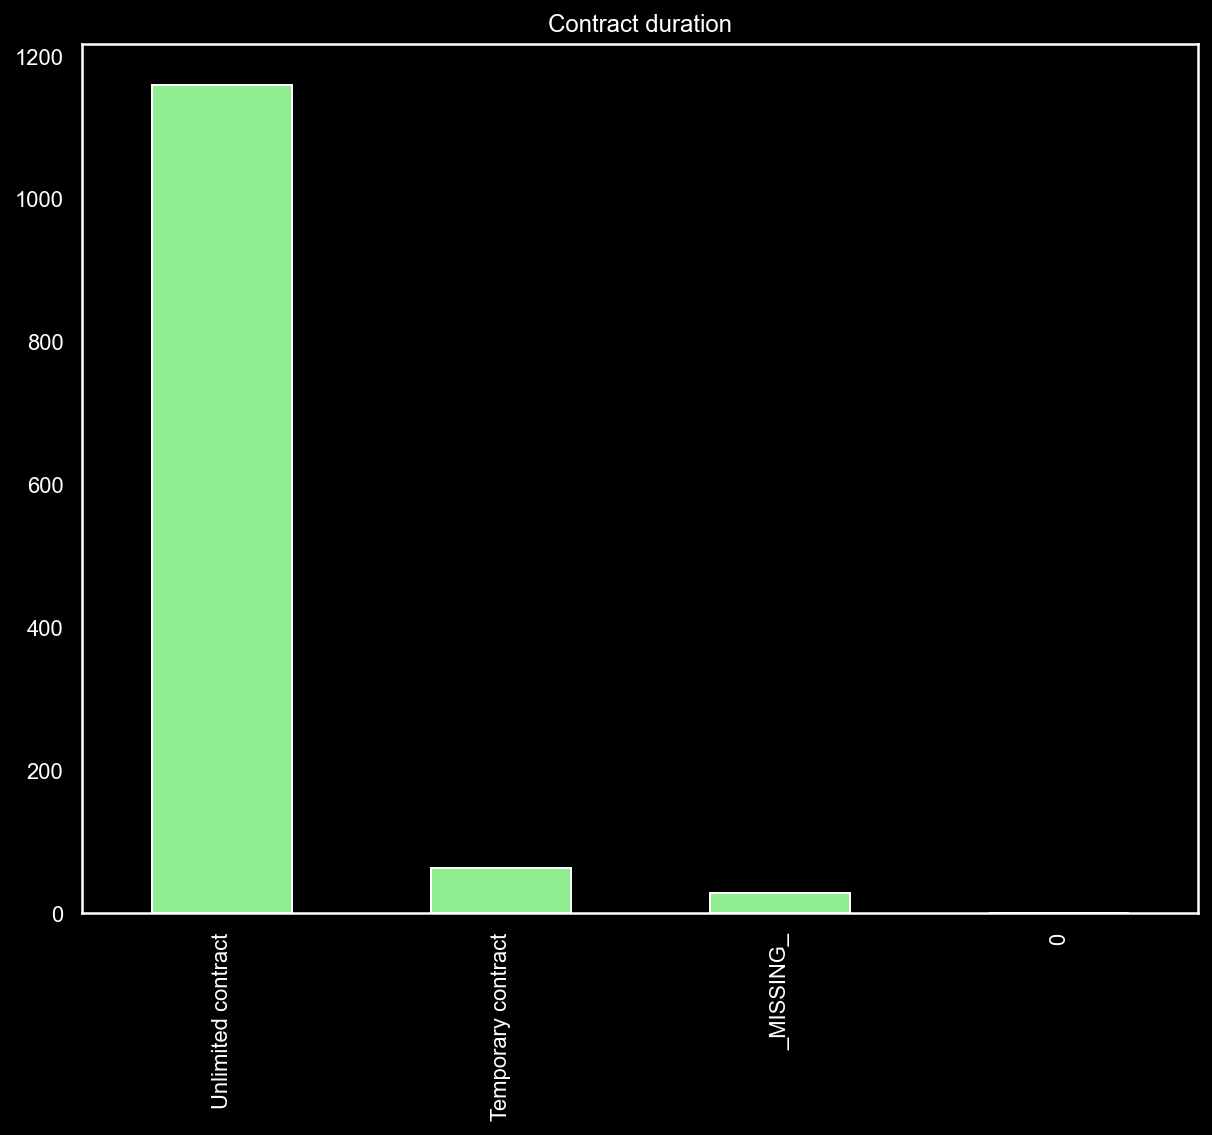

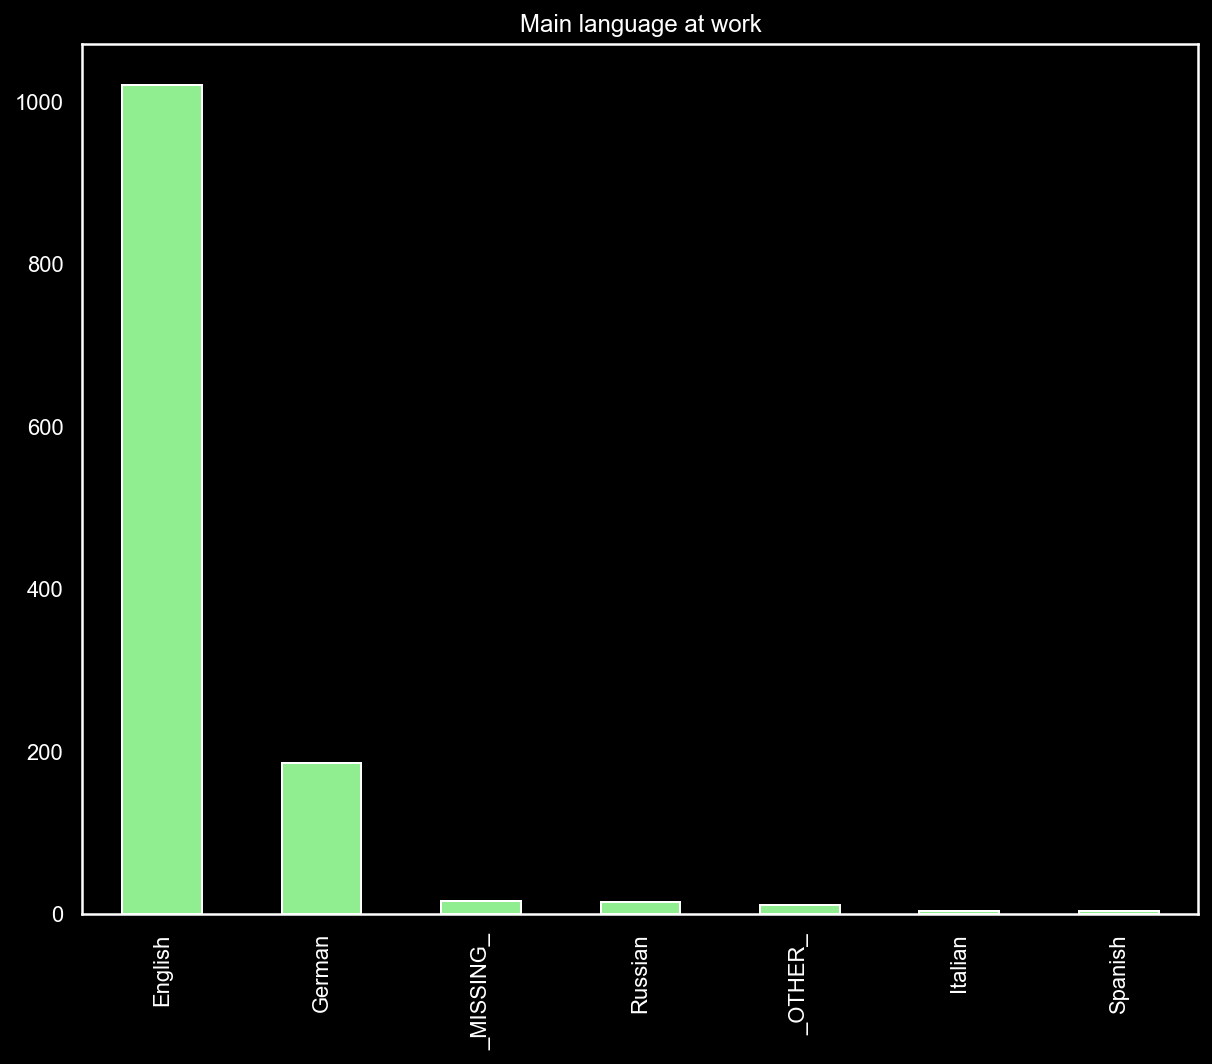

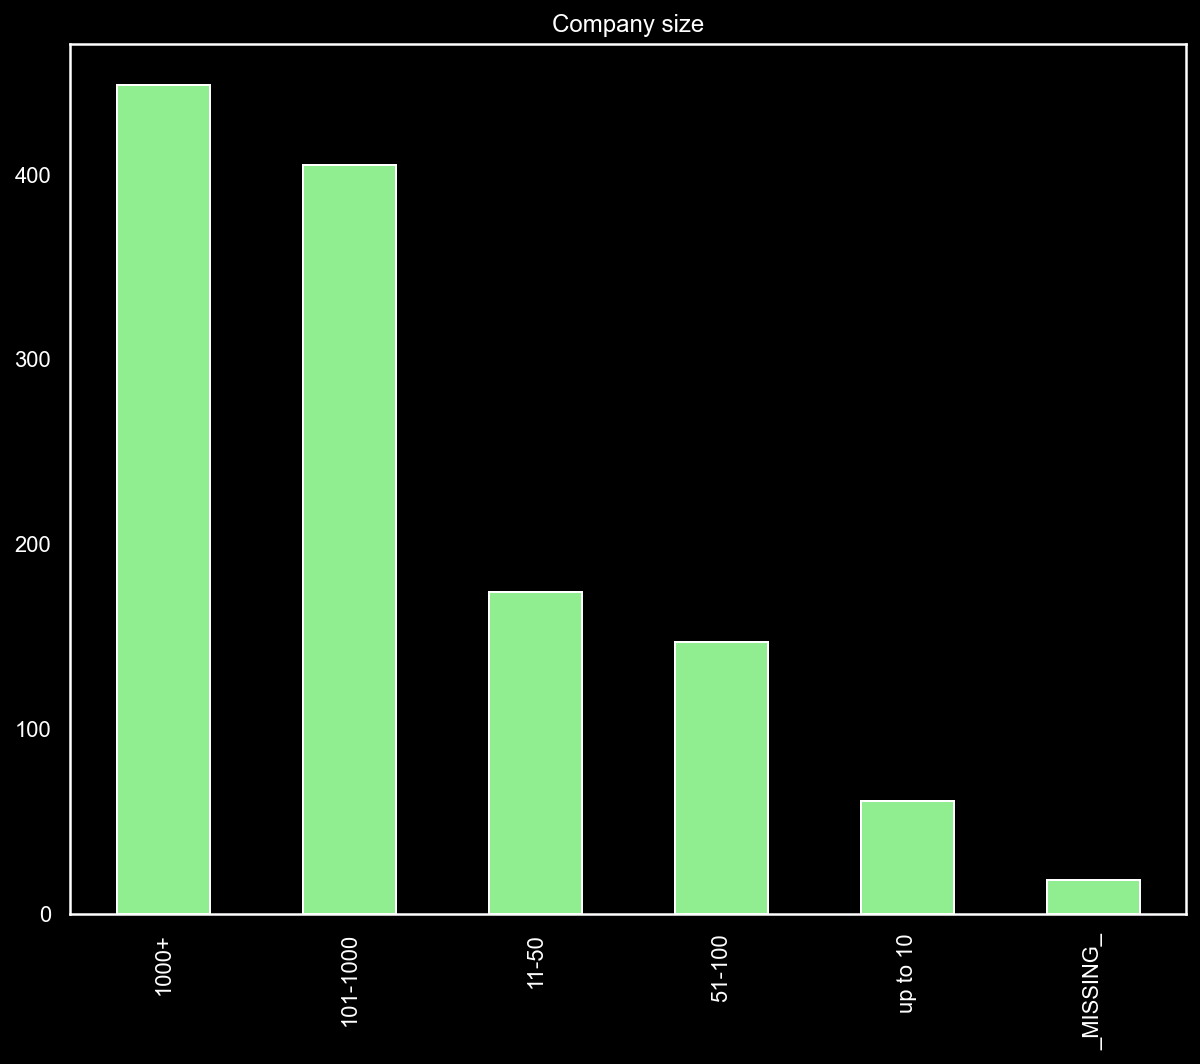

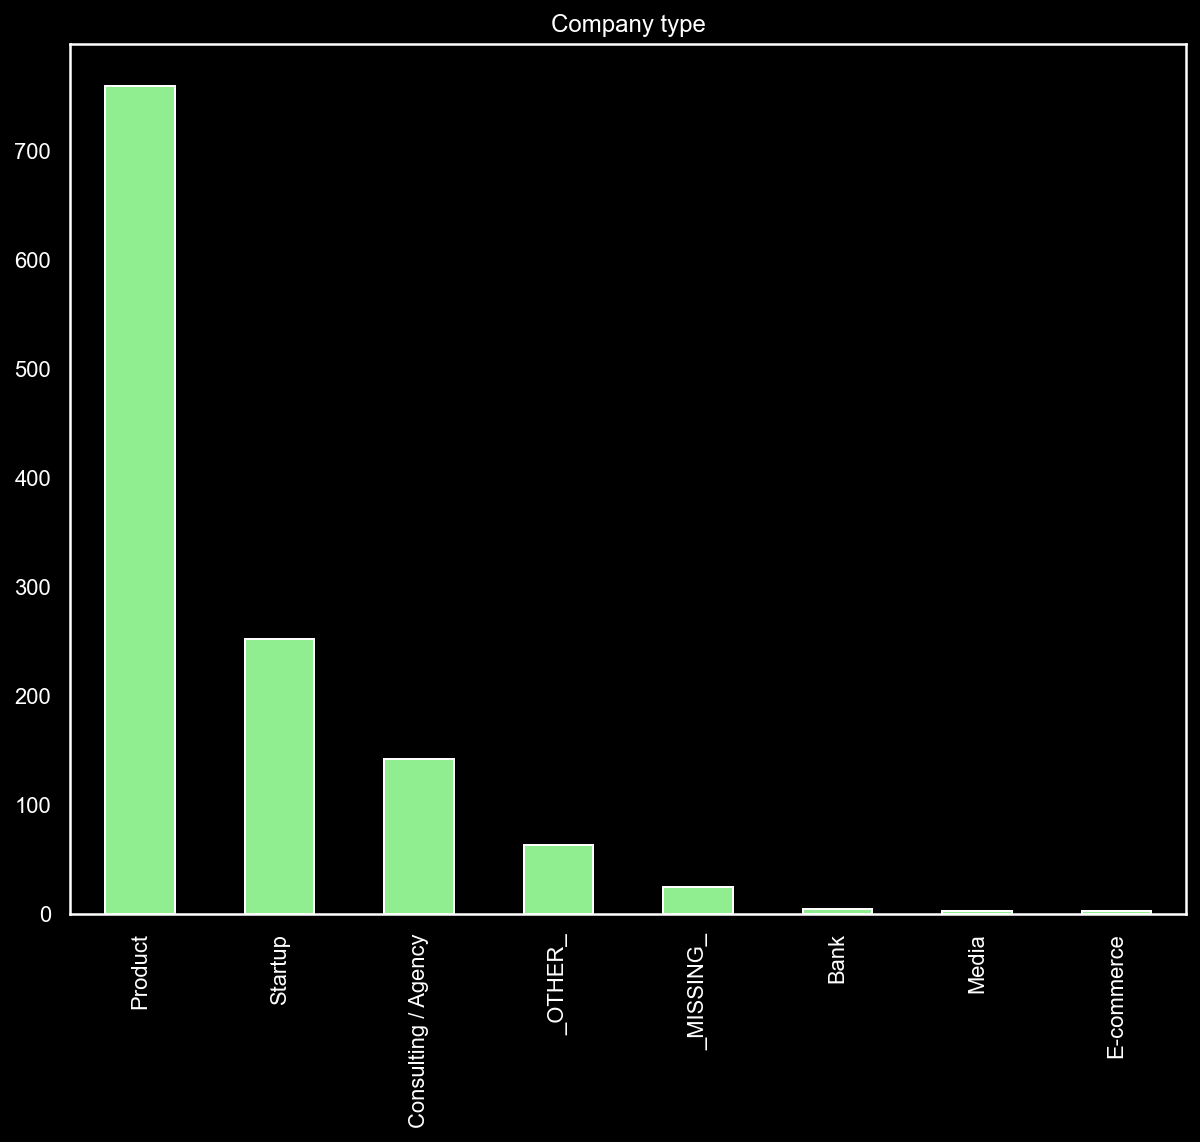

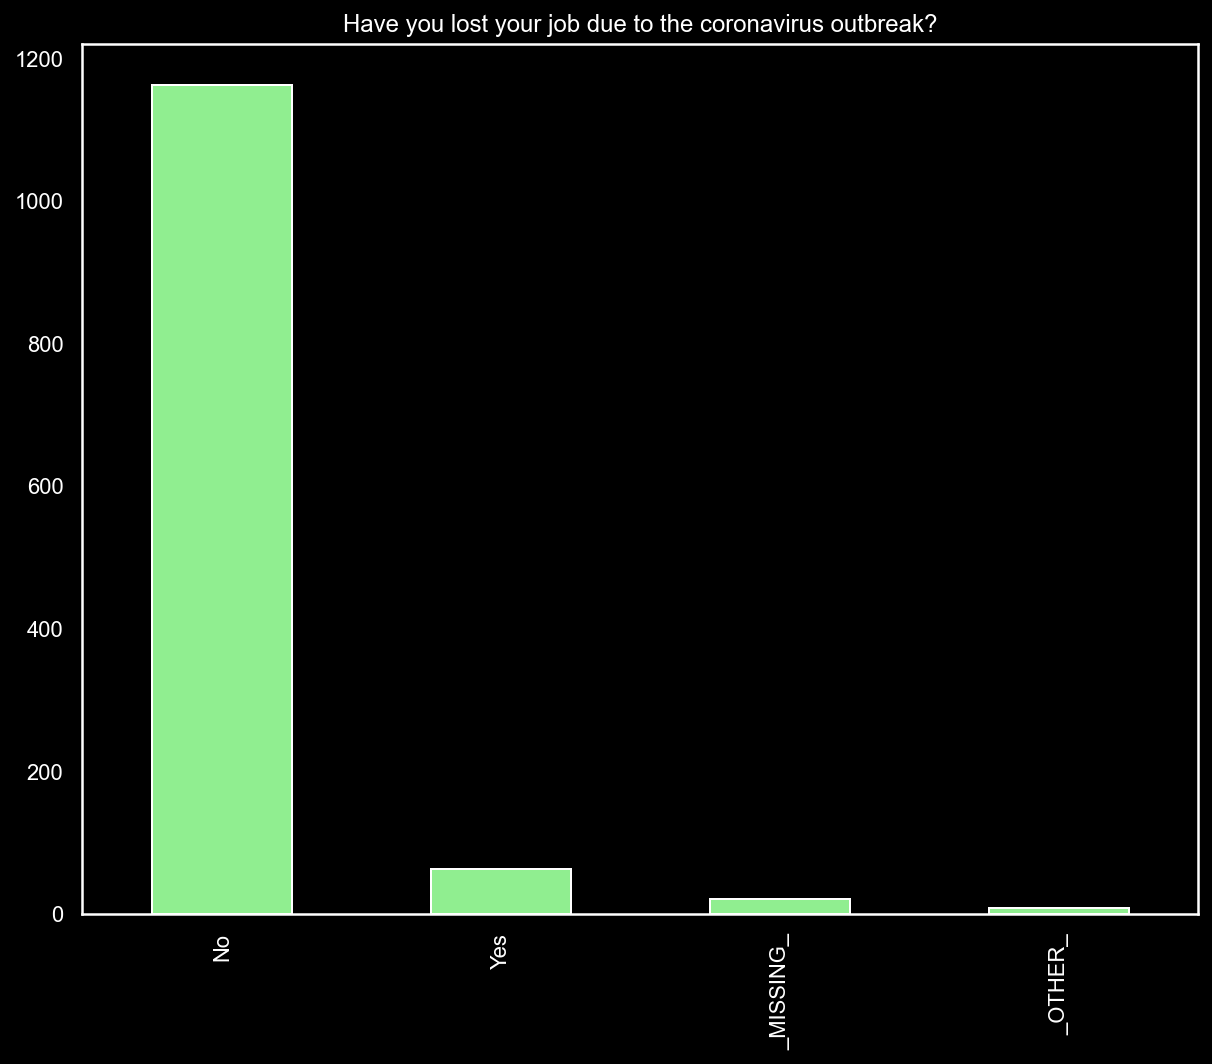

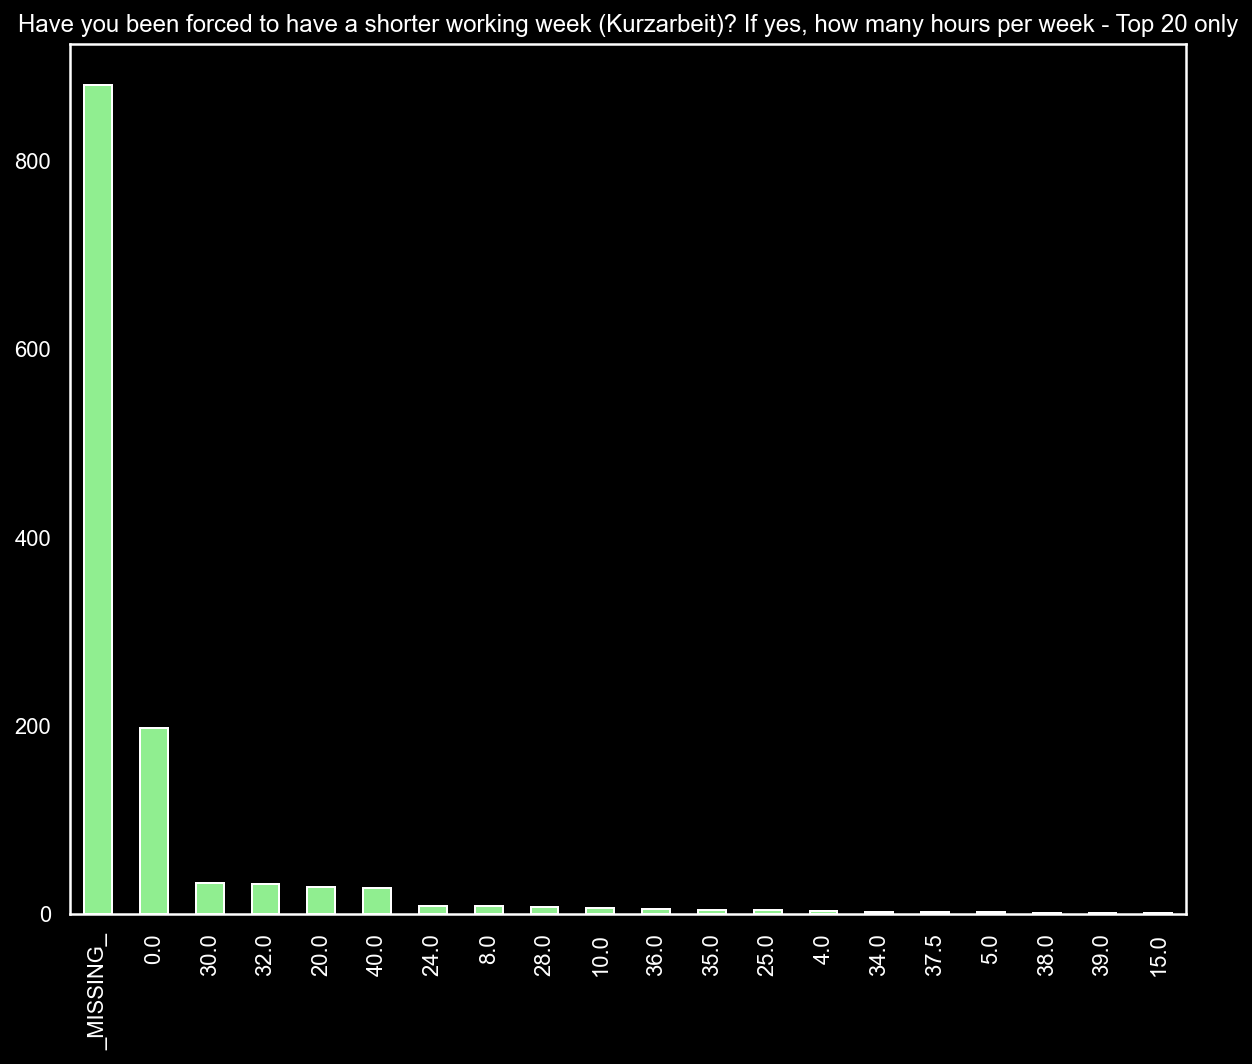

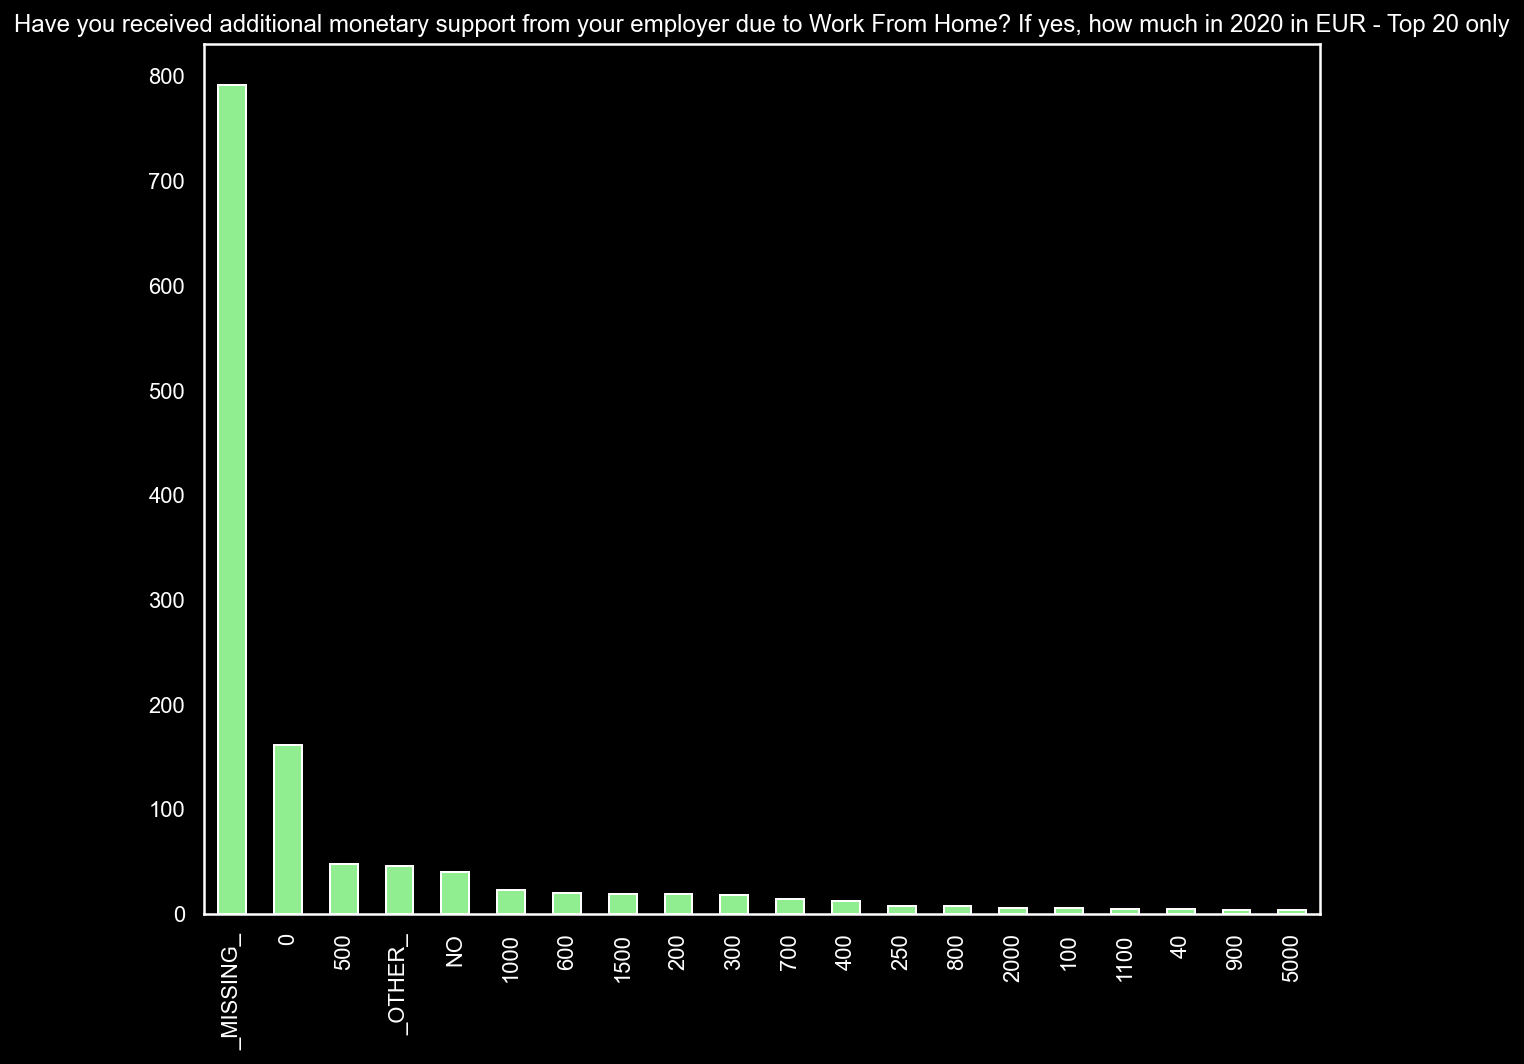

In [151]:
# plot distributions of categorical features
#Count of employees by all categorical columns
plt.style.use('dark_background')
for f in salarysurveycategorical:
    plt.figure(figsize=(10,8))
    val_c = salarysurvey[f].value_counts()
    if len(val_c) <= 20:
        val_c.plot(kind='bar', color='lightgreen')
        plt.title(f)
    else: # if more than 20 levels show only the most frequent 20
        val_c[0:20].plot(kind='bar', color='lightgreen')
        plt.title(f + ' - Top 20 only')
        
    plt.grid()
    plt.show()

###### #EXPLORATORY ANALYSIS OF NUMERICAL COLUMNS IN THE DATASET

In [ ]:
# change non-numerical values to numerical for analysis
No_of_vac_days = salarysurvey['Number of vacation days'] = pd.to_numeric(salarysurvey['Number of vacation days'], errors = 'coerce').fillna(0).astype(int)
Total_years_of_experience = salarysurvey['Total years of experience'] = pd.to_numeric(salarysurvey['Total years of experience'], errors = 'coerce').fillna(0).astype(int)
age = salarysurvey['Age'] = salarysurvey['Age'].fillna(0).astype(int)
Total_income = salarysurvey['Total Income (Salary+Bonus)'] = salarysurvey['Total Income (Salary+Bonus)'].astype(int)

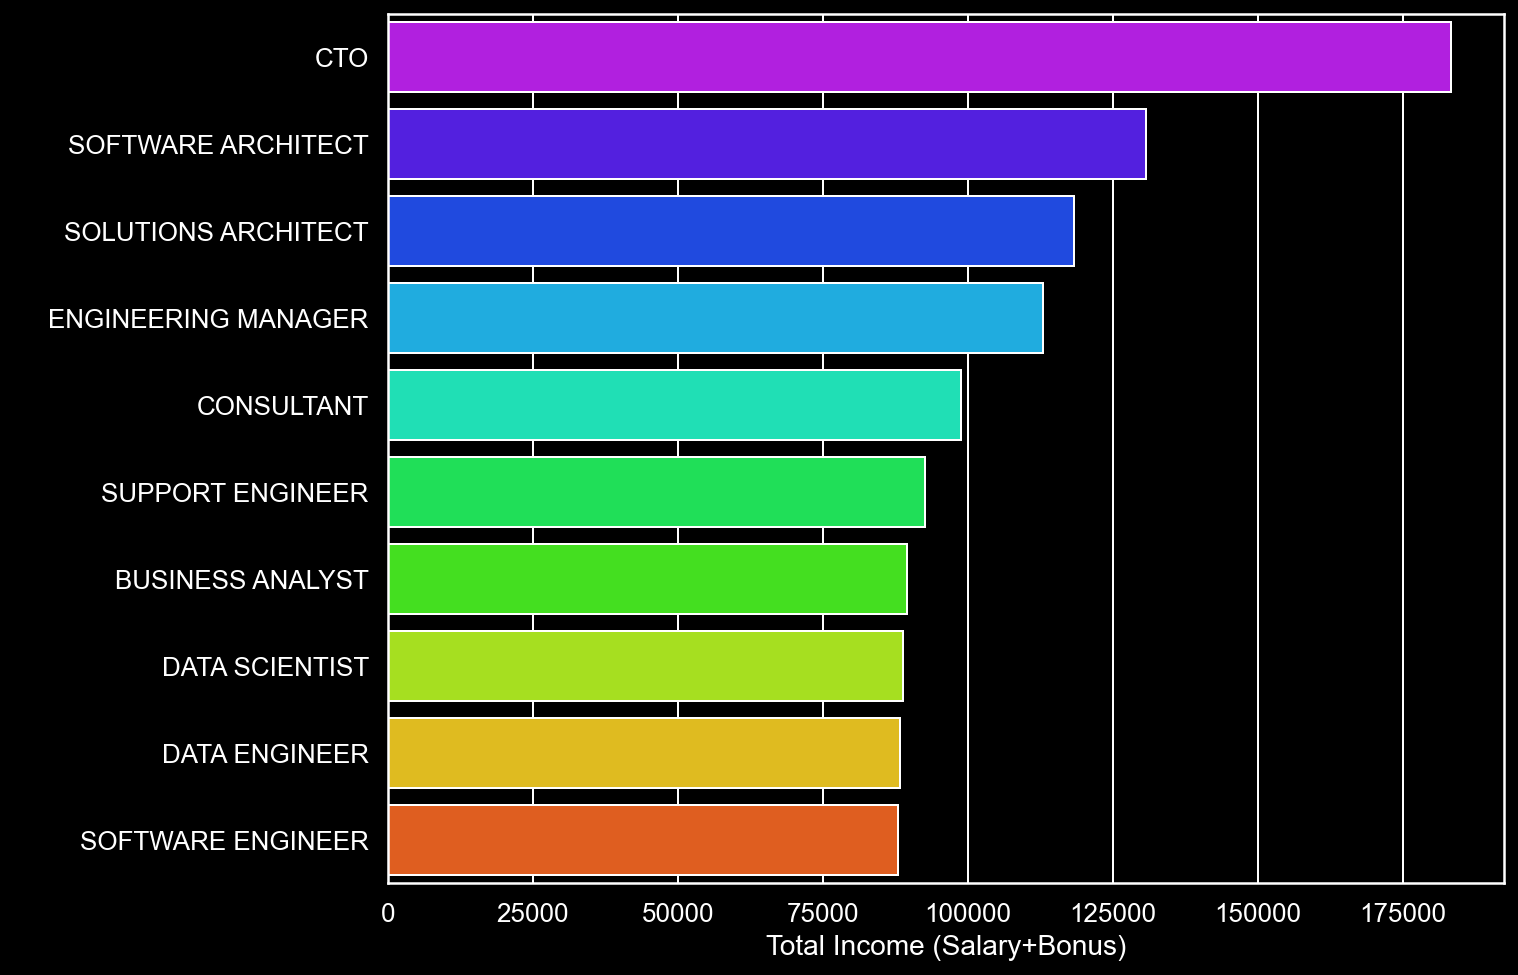

In [182]:
#Highest Income Earners by Profession
profession = salarysurvey.groupby('Position', as_index= False).mean().sort_values('Total Income (Salary+Bonus)', ascending = False).head(10)

plt.figure(figsize=(10,8))

sns.barplot(data=profession, y='Position',
            x= 'Total Income (Salary+Bonus)',
            palette="gist_rainbow_r")

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=13)
plt.xlabel("Total Income (Salary+Bonus)",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel(" ",fontsize=14)
plt.show()

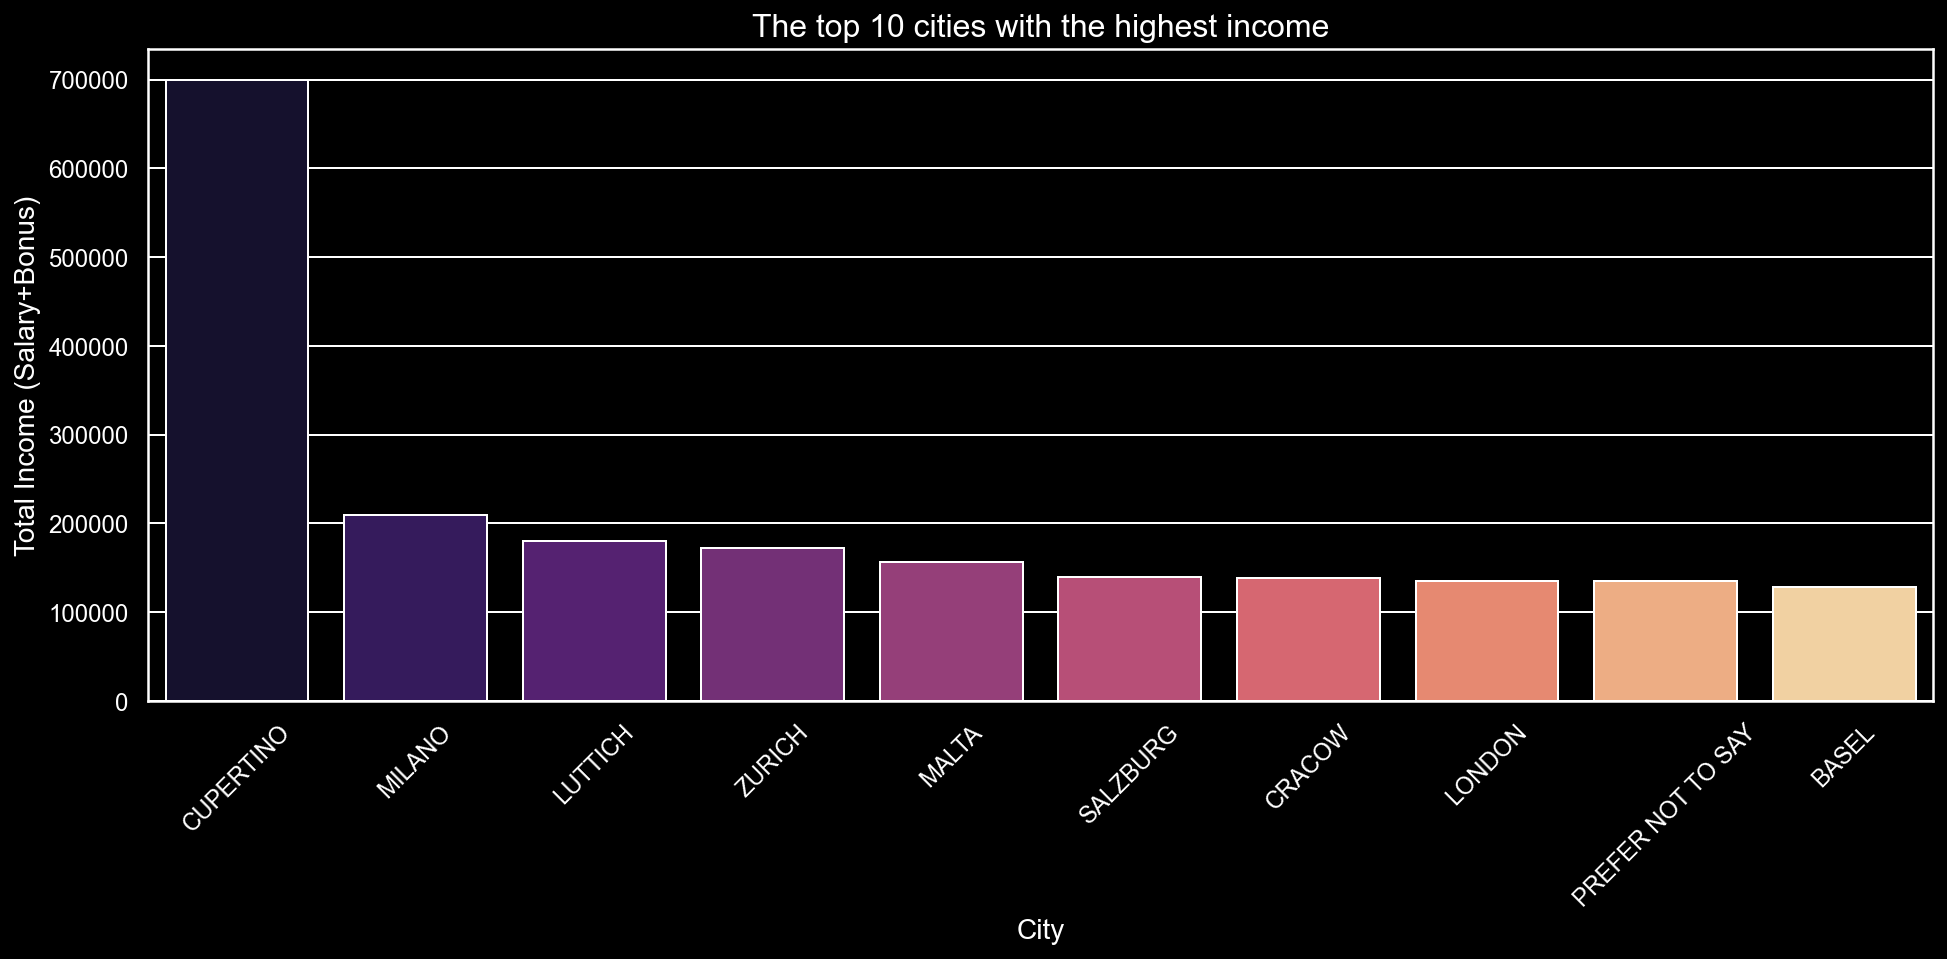

In [154]:
#Cities paying the highest income
city = salarysurvey['City'].unique()
Incomebycity = salarysurvey.groupby('City', as_index= False).mean().sort_values('Total Income (Salary+Bonus)', ascending = False).head(10)

plt.figure(figsize = (16,6))
ax = sns.barplot(data= Incomebycity, x= 'City', y= 'Total Income (Salary+Bonus)',palette= 'magma')
plt.title('The top 10 cities with the highest income', fontsize= 16)
plt.xlabel('City', fontsize = 14)
plt.ylabel('Total Income (Salary+Bonus)', fontsize= 14)
plt.xticks(fontsize= 12, rotation= 45)
plt.yticks(fontsize = 12)

plt.show()

Text(0.5, 1.0, 'Top 8 Income earners by seniority level')

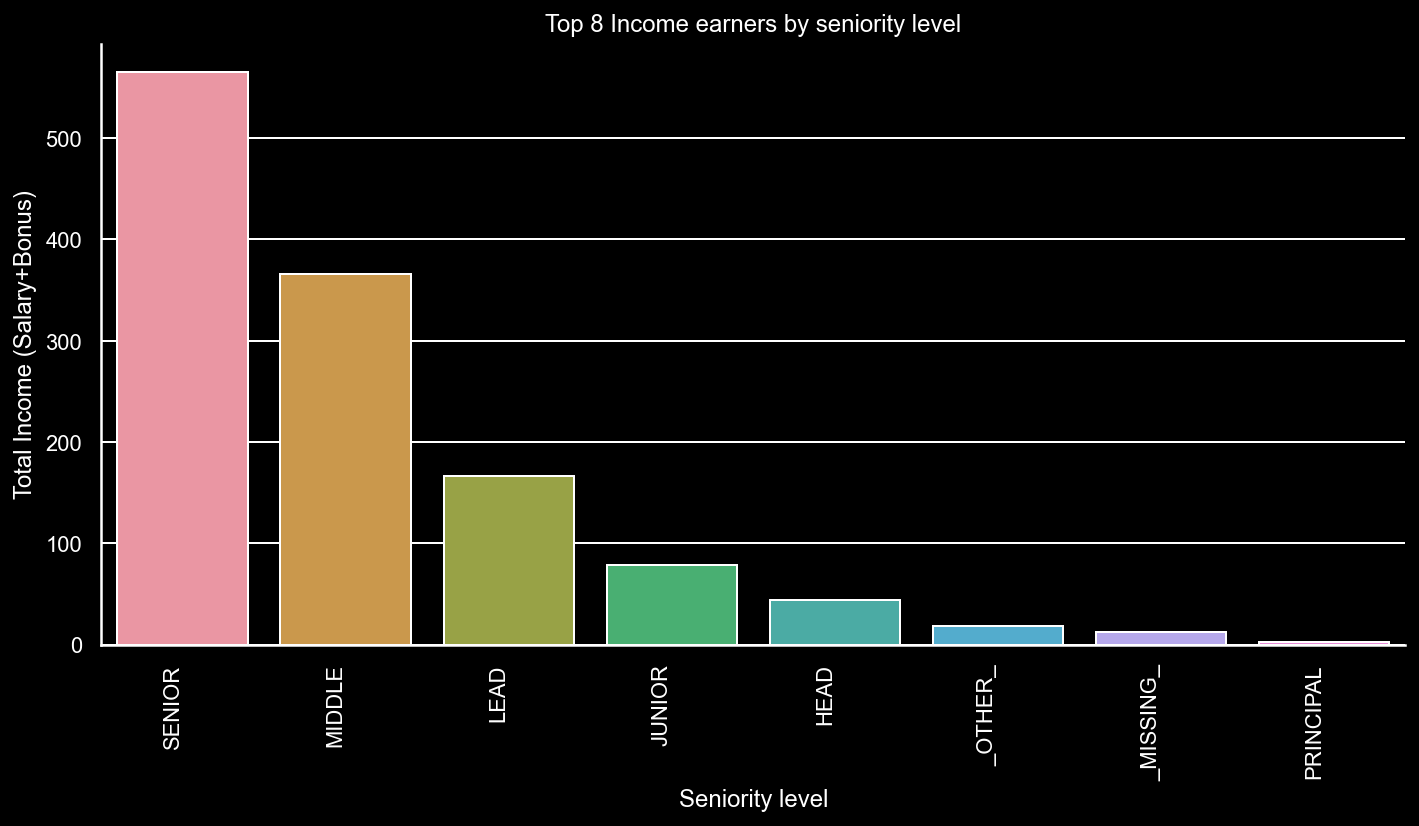

In [194]:
#Highest earners by seniority level
highest_earners=salarysurvey.groupby(['Seniority level']).size().reset_index(name='Total Income (Salary+Bonus)')
sns.catplot(x='Seniority level',y='Total Income (Salary+Bonus)',kind='bar',linewidth = 1,
           aspect = 2,data=highest_earners.nlargest(8, 'Total Income (Salary+Bonus)'))
sns.set_palette("gist_rainbow_r")
plt.xticks(rotation = 90, ha = 'right')
plt.title("Top 8 Income earners by seniority level")

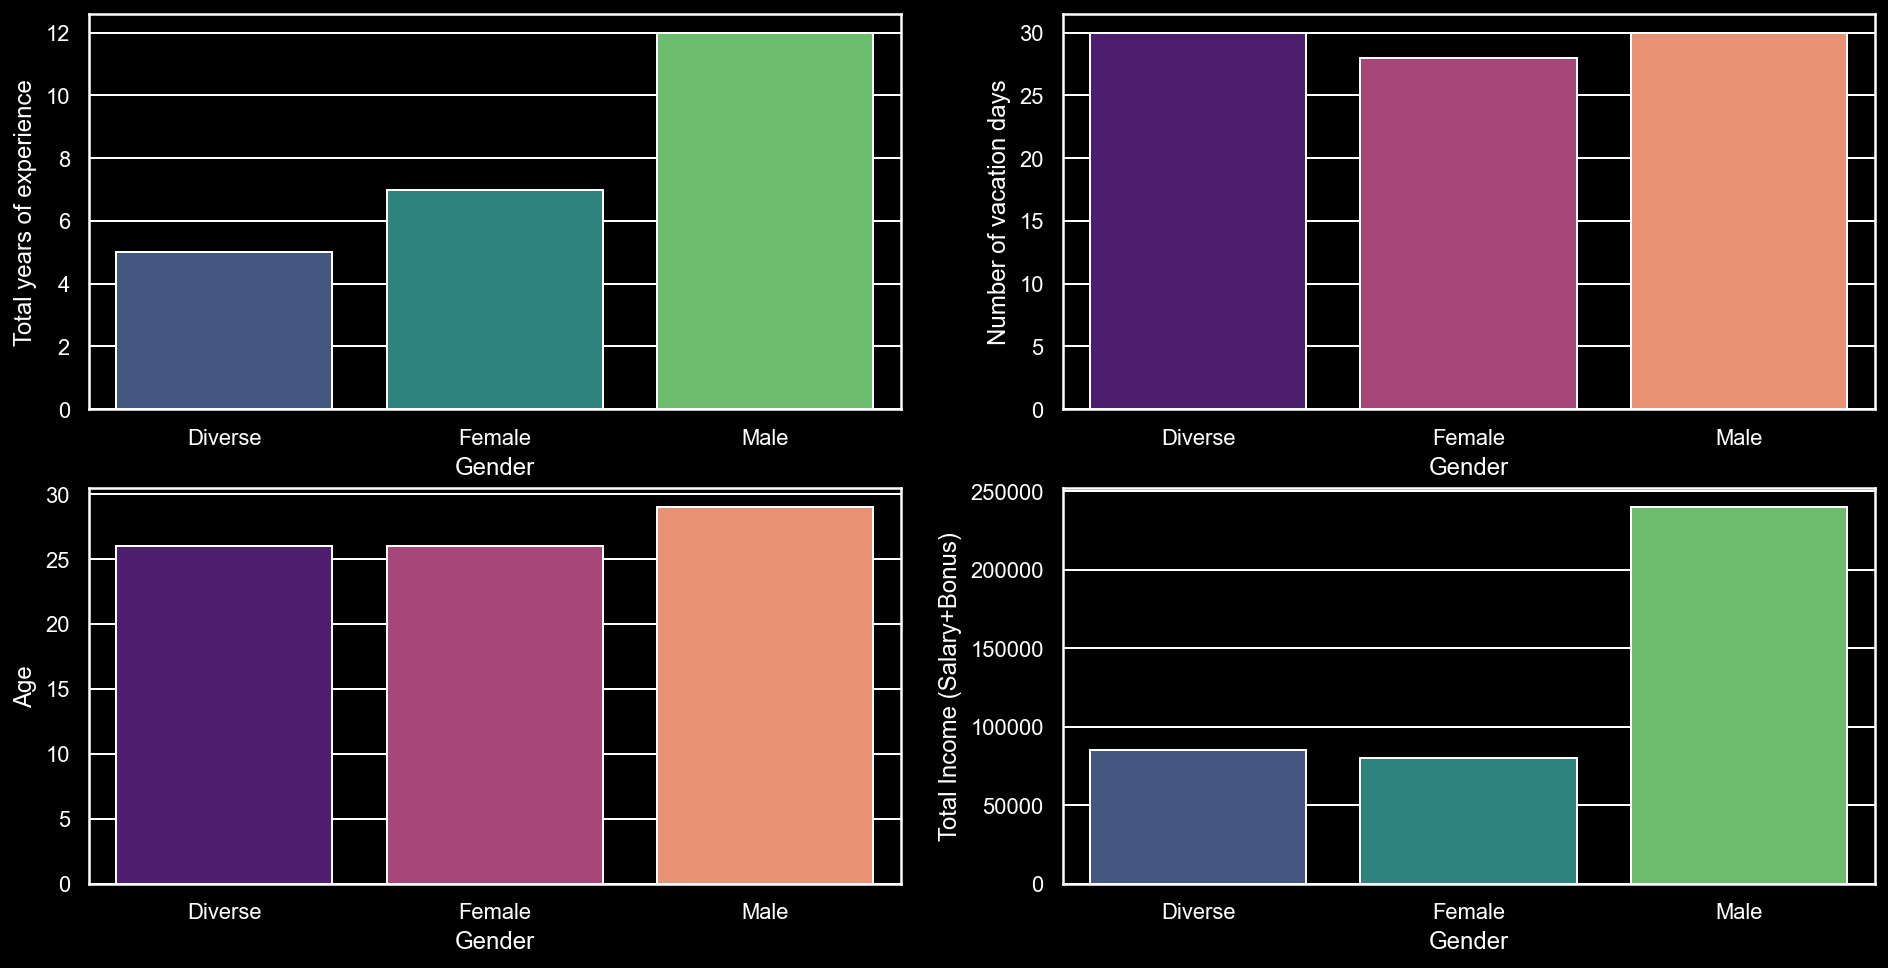

In [152]:
#Break down of gender by Years of experience, age, no of vacation days and total income (salary and stocks)

gender = salarysurvey.loc[salarysurvey['Gender'].isin(['Male', 'Female', 'Diverse'])]
gender_type = gender.groupby('Gender', as_index= False).mean()

fig = plt.figure(figsize= (16, 8))
axs = fig.subplots(nrows=2, ncols= 2)
sns.barplot(data = gender_type, x= 'Gender', y = No_of_vac_days, ax = axs[0,1], palette= 'magma')
sns.barplot(data = gender_type, x= 'Gender', y = Total_years_of_experience, ax = axs[0,0], palette = 'viridis')
sns.barplot(data = gender_type, x= 'Gender', y = age, ax = axs[1,0], palette = 'magma')
sns.barplot(data = gender_type, x= 'Gender', y = Total_income, ax = axs[1,1], palette = 'viridis')
plt.show()

Text(0.5, 1.0, 'Higest Income earners by programming language')

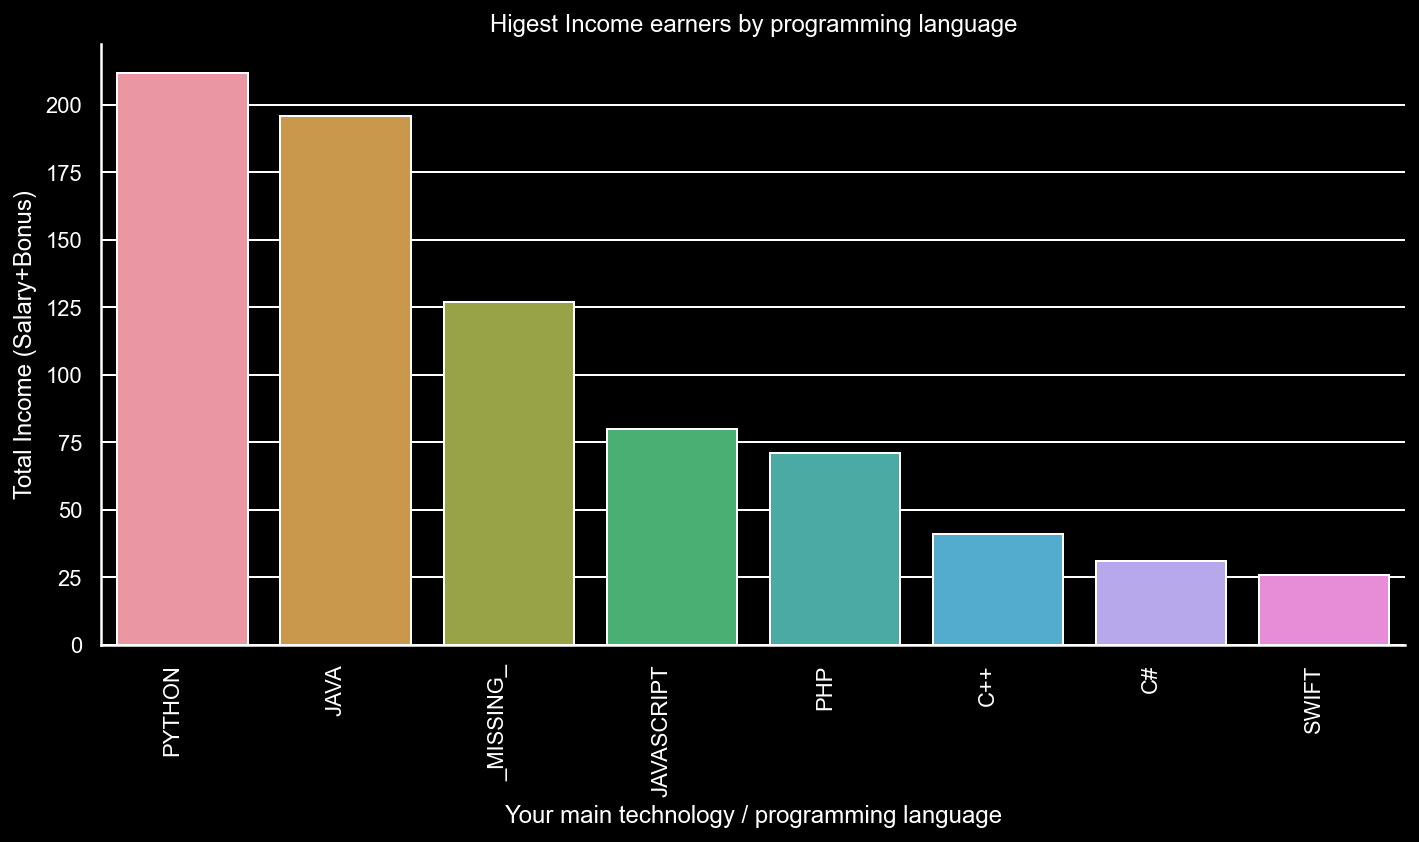

In [199]:
#Highest earning programming languages
highest_earners=salarysurvey.groupby(['Your main technology / programming language']).size().reset_index(name='Total Income (Salary+Bonus)')
sns.catplot(x='Your main technology / programming language',y='Total Income (Salary+Bonus)',kind='bar',linewidth = 1,
           aspect = 2,data=highest_earners.nlargest(8, 'Total Income (Salary+Bonus)'))
sns.set_palette("gist_rainbow_r")
plt.xticks(rotation = 90, ha = 'right')
plt.title("Higest Income earners by programming language")

(-0.5, 799.5, 599.5, -0.5)

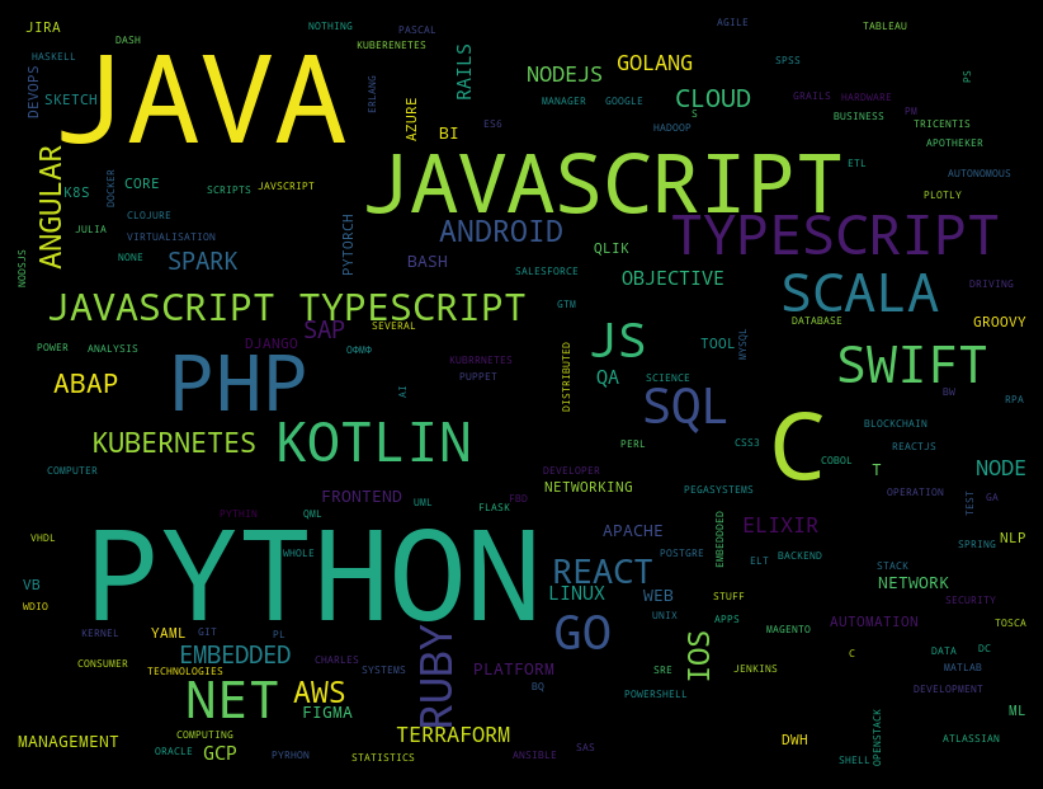

In [132]:
#OVERVIEW of all main technology / programming language
#wordcloud
f = 'Your main technology / programming language'
text_select = salarysurvey[f][salarysurvey[f] != '_MISSING_']
text = " ".join(txt for txt in text_select)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=500,
                      width = 800, height = 600,
                      background_color='black').generate(text)

plt.figure(figsize=(11,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

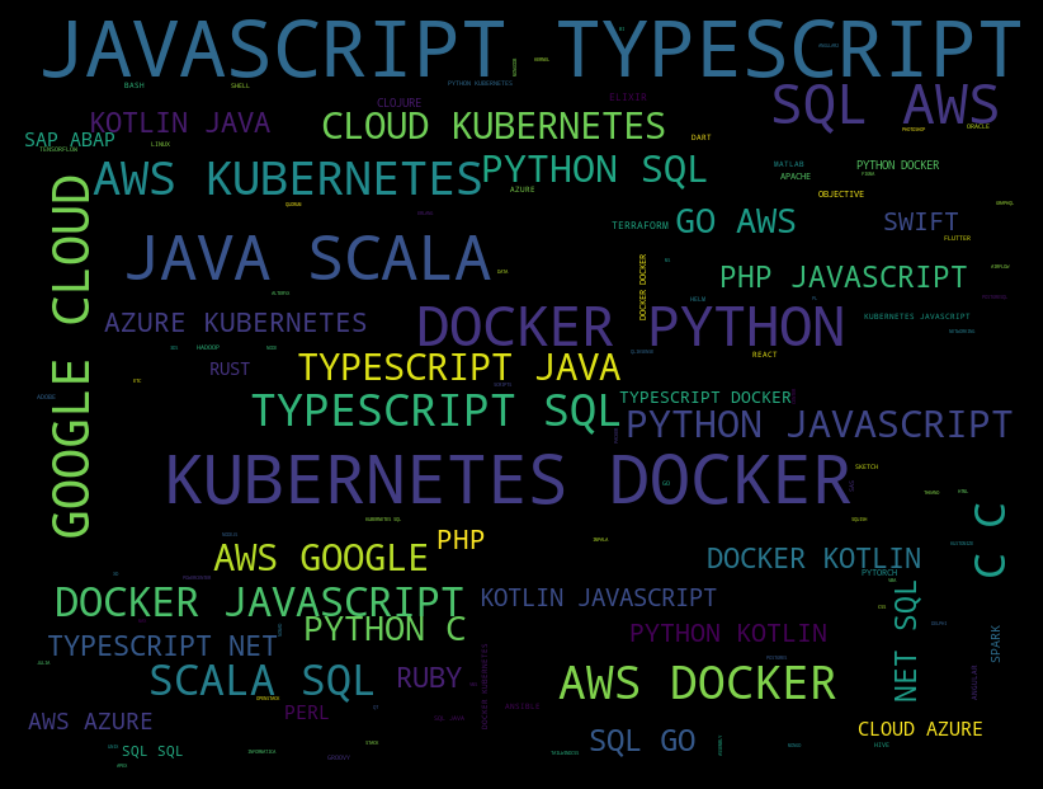

In [133]:
# Overview of all Other technologies/programming languages you use often
#wordcloud for other tech/PLs
f = 'Other technologies/programming languages you use often'
text_select = salarysurvey[f][salarysurvey[f] != '_MISSING_']
text = " ".join(txt for txt in text_select)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=500,
                      width = 800, height = 600,
                      background_color='black').generate(text)

plt.figure(figsize=(11,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()